In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

In [2]:
inv_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/"
gti_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNminGTI/"
ghi_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/"


In [17]:
dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 


In [8]:
dfCDT

,TIMESTAMP,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
0,2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
1,2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2,2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
3,2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
4,2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828685,2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
1828686,2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
1828687,2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0
1828688,2021-02-11 15:12:00,13115.860,215.6638,2.798108,597.4203,59.97649,615.8973,313.7646,2.058465,0.0,0,0,44.31250,38.33249,5.0


In [18]:
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)


In [10]:
dfCDT

,TIMESTAMP,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
0,2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
1,2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2,2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
3,2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
4,2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828685,2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
1828686,2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
1828687,2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0
1828688,2021-02-11 15:12:00,13115.860,215.6638,2.798108,597.4203,59.97649,615.8973,313.7646,2.058465,0.0,0,0,44.31250,38.33249,5.0


In [19]:
dfCDT = dfCDT.set_index('TIMESTAMP')


In [12]:
dfCDT

,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
TIMESTAMP,,,,,,,,,,,,,,
2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0


In [21]:
dfCDT

,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
TIMESTAMP,,,,,,,,,,,,,,
2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0


In [22]:
dfCDT.index.drop_duplicates()

DatetimeIndex(['2017-07-04 10:45:00', '2017-07-04 10:46:00',
               '2017-07-04 10:47:00', '2017-07-04 10:48:00',
               '2017-07-04 10:49:00', '2017-07-04 10:50:00',
               '2017-07-04 10:51:00', '2017-07-04 10:52:00',
               '2017-07-04 10:53:00', '2017-07-04 10:54:00',
               ...
               '2021-02-11 15:04:00', '2021-02-11 15:05:00',
               '2021-02-11 15:06:00', '2021-02-11 15:07:00',
               '2021-02-11 15:08:00', '2021-02-11 15:09:00',
               '2021-02-11 15:10:00', '2021-02-11 15:11:00',
               '2021-02-11 15:12:00', '2021-02-11 15:13:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=1828509, freq=None)

In [23]:
dfCDT

,E_tot,V_grid,I_grid,P_grid,F_grid,P_in1,V_in1,I_in1,P_in2,V_in2,I_in2,T_inverter,T_booster,R_iso
TIMESTAMP,,,,,,,,,,,,,,
2017-07-04 10:45:00,2193.921,234.6536,6.196396,1434.9640,59.98176,1479.3440,319.4513,4.700523,0.0,0,0,39.08350,33.51683,5.0
2017-07-04 10:46:00,2193.947,234.8455,6.196651,1439.2920,59.99952,1484.0010,319.8006,4.718031,0.0,0,0,39.08350,33.30969,5.0
2017-07-04 10:47:00,2193.972,234.7815,6.211050,1441.4260,60.00360,1486.0060,319.7704,4.747102,0.0,0,0,39.21859,33.41356,5.0
2017-07-04 10:48:00,2193.993,234.6642,6.275977,1450.1460,60.00192,1495.5130,320.0895,4.776174,0.0,0,0,39.24561,33.30969,5.0
2017-07-04 10:49:00,2194.021,234.4241,6.284834,1456.0430,59.98608,1501.0760,320.4254,4.810109,0.0,0,0,39.24561,33.15329,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 15:09:00,13115.830,215.2951,2.661140,552.9396,59.97337,570.0408,311.8500,1.941638,0.0,0,0,44.47314,38.33249,5.0
2021-02-11 15:10:00,13115.840,215.6855,2.843410,590.6448,60.01645,608.0389,312.9937,2.030582,0.0,0,0,44.47314,38.43271,5.0
2021-02-11 15:11:00,13115.840,215.6725,2.846778,598.1732,60.00326,615.9943,313.4791,2.041984,0.0,0,0,44.40621,38.42018,5.0


In [4]:
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)


AttributeError: 'DatetimeIndex' object has no attribute 'index'

In [24]:
dcac = ['P_in1', 
        'P_grid']

In [26]:
tzBRA = 'Etc/GMT+3'
tzETC = 'Etc/GMT-0'

dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)
dfCDT = dfCDT.set_index('TIMESTAMP')
#dfCDT = dfCDT.index.drop_duplicates()
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTnosync.index = dfCDTnosync.index.tz_localize(tzBRA)
dfCDTnosync.index = dfCDTnosync.index.tz_convert(tzETC)
dfCDTsync = dfCDT[dfCDT.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTsync.index = dfCDTsync.index.tz_localize(tzETC)
dfCDTsync = [dfCDTnosync, dfCDTsync]
dfCDTsync = pd.concat(dfCDTsync)
dfCDTsync = dfCDTsync
dfPCDT = dfCDTsync[dcac]
dfPCDT = dfPCDT.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']

In [28]:
dfPCDT.index

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:01:00+00:00',
               '2018-01-01 00:02:00+00:00', '2018-01-01 00:03:00+00:00',
               '2018-01-01 00:04:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:06:00+00:00', '2018-01-01 00:07:00+00:00',
               '2018-01-01 00:08:00+00:00', '2018-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT-0]', name='TIMESTAMP', length=1512451, freq=None)

In [29]:
unique = dfPCDT.index.drop_duplicates()

In [30]:
unique

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:01:00+00:00',
               '2018-01-01 00:02:00+00:00', '2018-01-01 00:03:00+00:00',
               '2018-01-01 00:04:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:06:00+00:00', '2018-01-01 00:07:00+00:00',
               '2018-01-01 00:08:00+00:00', '2018-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT-0]', name='TIMESTAMP', length=1512270, freq=None)

In [32]:
new = dfPCDT.loc[unique]

In [33]:
new

,P_in1,P_grid
TIMESTAMP,,
2018-01-01 00:00:00+00:00,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0
...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0


In [34]:
dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)
dfCDT = dfCDT.drop_duplicates(subset=['TIMESTAMP'])
dfCDT = dfCDT.set_index('TIMESTAMP')
#dfCDT = dfCDT.index.drop_duplicates()
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTnosync.index = dfCDTnosync.index.tz_localize(tzBRA)
dfCDTnosync.index = dfCDTnosync.index.tz_convert(tzETC)
dfCDTsync = dfCDT[dfCDT.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTsync.index = dfCDTsync.index.tz_localize(tzETC)
dfCDTsync = [dfCDTnosync, dfCDTsync]
dfCDTsync = pd.concat(dfCDTsync)
dfPCDT = dfCDTsync[dcac]
dfPCDT = dfPCDT.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDT = dfPCDT.rename(columns={"P_in1": "Paccdt", "P_grid": "Pdccdt"})
dfPCDT.shape

(1512270, 2)

In [35]:
dfPCDT

,Paccdt,Pdccdt
TIMESTAMP,,
2018-01-01 00:00:00+00:00,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0
...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0


In [36]:
dfCDTA  = pd.read_csv(inv_path + 'CDTA.csv') 
dfCDTA['TIMESTAMP'] = dfCDTA['TIMESTAMP'].astype(np.datetime64)
dfCDTA = dfCDTA.drop_duplicates(subset=['TIMESTAMP'])
dfCDTA = dfCDTA.set_index('TIMESTAMP')
dfCDTAnosync = dfCDTA[dfCDTA.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTAnosync.index = dfCDTAnosync.index.tz_localize(tzBRA)
dfCDTAnosync.index = dfCDTAnosync.index.tz_convert(tzETC)
dfCDTAsync = dfCDTA[dfCDTA.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTAsync.index = dfCDTAsync.index.tz_localize(tzETC)
dfCDTAsync = [dfCDTAnosync, dfCDTAsync]
dfCDTAsync = pd.concat(dfCDTAsync)
dfPCDTA = dfCDTAsync[dcac]
dfPCDTA = dfPCDTA.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDTA = dfPCDTA.rename(columns={"P_in1": "Paccdta", "P_grid": "Pdccdta"})
dfPCDTA.shape

(1512270, 2)

In [37]:
dfPCDTA

,Paccdta,Pdccdta
TIMESTAMP,,
2018-01-01 00:00:00+00:00,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0
...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0


In [38]:
dfPSI  = pd.read_csv(inv_path + 'PSI.csv') 
dfPSI['TIMESTAMP'] = dfPSI['TIMESTAMP'].astype(np.datetime64)
dfPSI = dfPSI.drop_duplicates(subset=['TIMESTAMP'])
dfPSI = dfPSI.set_index('TIMESTAMP')
#dfPSI = dfPSI.index.drop_duplicates()
dfPSInosync = dfPSI[dfPSI.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfPSInosync.index = dfPSInosync.index.tz_localize(tzBRA)
dfPSInosync.index = dfPSInosync.index.tz_convert(tzETC)
dfPSIsync = dfPSI[dfPSI.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfPSIsync.index = dfPSIsync.index.tz_localize(tzETC)
dfPSIsync = [dfPSInosync, dfPSIsync]
dfPSIsync = pd.concat(dfPSIsync)
dfPPSI = dfPSIsync[dcac]
dfPPSI = dfPPSI.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPPSI = dfPPSI.rename(columns={"P_in1": "Pacpsi", "P_grid": "Pdcpsi"})
dfPPSI.shape

(1514445, 2)

In [39]:
dfPPSI

,Pacpsi,Pdcpsi
TIMESTAMP,,
2018-01-01 00:00:00+00:00,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0
...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0


In [220]:
dfPPSI =dfPPSI.dropna(axis = 0, how = 'any')

In [229]:
nulpsi = dfPPSI[dfPPSI['Pdcpsi'] == 0]

In [232]:
hour = nulpsi.index.hour

In [238]:
selector = ((6 <= hour) & (hour <= 18))

In [251]:
faltapsi= nulpsi.between_time(start_time='11:00', end_time='20:00')

In [252]:
faltapsi

,Pacpsi,Pdcpsi
TIMESTAMP,,
2018-01-09 18:19:00+00:00,0.0,0.0
2018-01-09 18:20:00+00:00,0.0,0.0
2018-01-09 18:21:00+00:00,0.0,0.0
2018-01-09 18:22:00+00:00,0.0,0.0
2018-01-11 19:42:00+00:00,0.0,0.0
...,...,...
2020-12-19 15:15:00+00:00,0.0,0.0
2020-12-19 15:16:00+00:00,0.0,0.0
2020-12-19 15:17:00+00:00,0.0,0.0


In [242]:
nulcdt = dfPCDT[dfPCDT['Pdccdt'] == 0]

In [253]:
faltacdt = nulcdt.between_time(start_time='11:00', end_time='20:00')

In [254]:
faltacdt

,Paccdt,Pdccdt
TIMESTAMP,,
2018-01-09 18:19:00+00:00,0.0,0.0
2018-01-09 18:20:00+00:00,0.0,0.0
2018-01-09 18:21:00+00:00,0.0,0.0
2018-01-09 18:22:00+00:00,0.0,0.0
2018-01-10 11:30:00+00:00,0.0,0.0
...,...,...
2020-12-19 15:27:00+00:00,0.0,0.0
2020-12-19 15:28:00+00:00,0.0,0.0
2020-12-19 15:29:00+00:00,0.0,0.0


In [244]:
nulcdta = dfPCDTA[dfPCDTA['Pdccdta'] == 0]

In [255]:
faltacdta = nulcdta.between_time(start_time='11:00', end_time='20:00')

In [256]:
faltacdta

,Paccdta,Pdccdta
TIMESTAMP,,
2018-01-09 18:19:00+00:00,0.0,0.0
2018-01-09 18:20:00+00:00,0.0,0.0
2018-01-09 18:21:00+00:00,0.0,0.0
2018-01-09 18:22:00+00:00,0.0,0.0
2018-01-10 11:30:00+00:00,0.0,0.0
...,...,...
2020-12-19 15:29:00+00:00,0.0,0.0
2020-12-19 15:30:00+00:00,0.0,0.0
2020-12-19 15:31:00+00:00,0.0,0.0


In [41]:
pvsi = pd.merge(dfPCDT,dfPCDTA, how = 'left',left_index = True, right_index = True)


In [42]:
pvsi

,Paccdt,Pdccdt,Paccdta,Pdccdta
TIMESTAMP,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0


In [44]:
pvsi = pd.merge(pvsi,dfPPSI, how = 'left',left_index = True, right_index = True)


In [45]:
pvsi

,Paccdt,Pdccdt,Paccdta,Pdccdta,Pacpsi,Pdcpsi
TIMESTAMP,,,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
GHIsensor = ['GHIP_SMP11',
             'F_GHIP_SMP11']

GTIsensor = ['TGIP_SMP11_VENT',
             'F_TGIP_SMP11_VENT']

In [48]:
dfgti18 = pd.read_pickle(gti_path + '2018' +'gtiFLAG.pkl')
dfgti19 = pd.read_pickle(gti_path + '2019' +'gtiFLAG.pkl')
dfgti20 = pd.read_pickle(gti_path + '2020' +'gtiFLAG.pkl')
dfgtis = [dfgti18[GTIsensor], dfgti19[GTIsensor], dfgti20[GTIsensor]]
dfgtis = pd.concat(dfgtis)

In [49]:
dfgtis

,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT
2018-01-01 00:00:00+00:00,-0.823333,0
2018-01-01 00:01:00+00:00,-0.800000,0
2018-01-01 00:02:00+00:00,-0.800000,0
2018-01-01 00:03:00+00:00,-0.890000,0
2018-01-01 00:04:00+00:00,-1.105000,0
...,...,...
2020-12-31 23:55:00+00:00,-1.100000,0
2020-12-31 23:56:00+00:00,-1.100000,0
2020-12-31 23:57:00+00:00,-1.103333,0
2020-12-31 23:58:00+00:00,-1.100000,0


In [50]:
dfgtis.index.drop_duplicates()

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:01:00+00:00',
               '2018-01-01 00:02:00+00:00', '2018-01-01 00:03:00+00:00',
               '2018-01-01 00:04:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:06:00+00:00', '2018-01-01 00:07:00+00:00',
               '2018-01-01 00:08:00+00:00', '2018-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT]', length=1575023, freq=None)

In [51]:
dfghi18 = pd.read_pickle(ghi_path + '2018' +'ghiFLAG.pkl')
dfghi19 = pd.read_pickle(ghi_path + '2019' +'ghiFLAG.pkl')
dfghi20 = pd.read_pickle(ghi_path + '2020' +'ghiFLAG.pkl')
dfghis = [dfghi18[GHIsensor], dfghi19[GHIsensor], dfghi20[GHIsensor]]
dfghis = pd.concat(dfghis)

In [52]:
dfghis

,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,-2.200000,1
2018-01-01 00:01:00+00:00,-2.183333,1
2018-01-01 00:02:00+00:00,-2.185000,1
2018-01-01 00:03:00+00:00,-2.246667,1
2018-01-01 00:04:00+00:00,-2.650000,1
...,...,...
2020-12-31 23:55:00+00:00,-4.770000,3
2020-12-31 23:56:00+00:00,-4.776667,3
2020-12-31 23:57:00+00:00,-4.793333,3
2020-12-31 23:58:00+00:00,-4.800000,3


In [53]:
dfghis.index.drop_duplicates()

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:01:00+00:00',
               '2018-01-01 00:02:00+00:00', '2018-01-01 00:03:00+00:00',
               '2018-01-01 00:04:00+00:00', '2018-01-01 00:05:00+00:00',
               '2018-01-01 00:06:00+00:00', '2018-01-01 00:07:00+00:00',
               '2018-01-01 00:08:00+00:00', '2018-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT]', length=1575023, freq=None)

In [54]:
dfirad = pd.merge(dfgtis,dfghis, how = 'left',left_index = True, right_index = True)


In [55]:
dfirad

,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,-0.823333,0,-2.200000,1
2018-01-01 00:01:00+00:00,-0.800000,0,-2.183333,1
2018-01-01 00:02:00+00:00,-0.800000,0,-2.185000,1
2018-01-01 00:03:00+00:00,-0.890000,0,-2.246667,1
2018-01-01 00:04:00+00:00,-1.105000,0,-2.650000,1
...,...,...,...,...
2020-12-31 23:55:00+00:00,-1.100000,0,-4.770000,3
2020-12-31 23:56:00+00:00,-1.100000,0,-4.776667,3
2020-12-31 23:57:00+00:00,-1.103333,0,-4.793333,3
2020-12-31 23:58:00+00:00,-1.100000,0,-4.800000,3


In [56]:
pxir = pd.merge(pvsi,dfirad, how = 'left',left_index = True, right_index = True)


In [418]:
pxir

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-01-01 09:18:00+00:00,0.141575,0.137328,0.248801,0.208871,5.670451,4.225675,23.460000,0,22.366667,0,0.000419
2018-01-01 09:19:00+00:00,2.365055,3.046951,3.639148,3.529974,8.430031,7.858465,24.440000,0,23.553333,0,0.006720
2018-01-01 09:20:00+00:00,8.832820,7.877726,8.463873,8.083471,14.737640,14.295510,25.558333,0,24.875000,0,0.024000
2018-01-01 09:21:00+00:00,9.738307,9.446158,10.550240,10.233740,18.614190,18.055770,25.400000,0,24.745000,0,0.026625
2018-01-01 09:22:00+00:00,10.773150,10.449960,12.049820,11.688320,20.125390,19.521630,25.380000,0,24.265000,0,0.029477
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:41:00+00:00,9.156209,7.752251,12.245410,11.878050,32.642060,31.726530,25.995000,0,23.616667,0,0.024460
2020-12-31 21:42:00+00:00,10.902500,10.575430,13.027800,12.636970,33.331950,32.332000,24.768333,0,22.063333,0,0.030568
2020-12-31 21:43:00+00:00,10.902500,10.230380,13.027800,12.636970,31.557940,30.611200,21.841667,0,19.018333,0,0.034664
2020-12-31 21:44:00+00:00,5.469584,6.434767,7.811882,6.628881,26.498710,25.703750,18.908333,0,15.995000,0,0.020088


In [58]:
dfgtis = dfgtis[dfgtis.F_TGIP_SMP11_VENT < 4]
dfghis = dfghis[dfghis.F_GHIP_SMP11 < 4]


In [59]:
dfgtis.shape

(1567635, 2)

In [60]:
dfghis.shape

(1574921, 2)

In [62]:
dfirad2 = pd.merge(dfgtis,dfghis, how = 'inner',left_index = True, right_index = True)
dfirad2.shape


(1567607, 4)

In [63]:
pxir2 = pd.merge(pvsi,dfirad2, how = 'inner',left_index = True, right_index = True)


In [64]:
pxir2.shape

(1504513, 10)

In [66]:
pxir2.to_pickle(inv_path  + 'PowervsIrrad.pkl')


In [67]:
pxir2

,Paccdt,Pdccdt,Paccdta,Pdccdta,Pacpsi,Pdcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.823333,0,-2.200000,1
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.183333,1
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.185000,1
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.890000,0,-2.246667,1
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.105000,0,-2.650000,1
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.770000,3
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.776667,3
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.103333,0,-4.793333,3
2020-12-31 23:58:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.800000,3


In [96]:
start = pd.to_datetime('2020-10-17 15:13:00+00:00')


In [76]:
start 

Timestamp('2020-10-17 15:13:00+0000', tz='UTC')

In [97]:
ini = start  + datetime.timedelta(minutes=5)


In [99]:
end = ini

In [98]:
fim = start  - datetime.timedelta(minutes=5)


In [100]:
start = fim

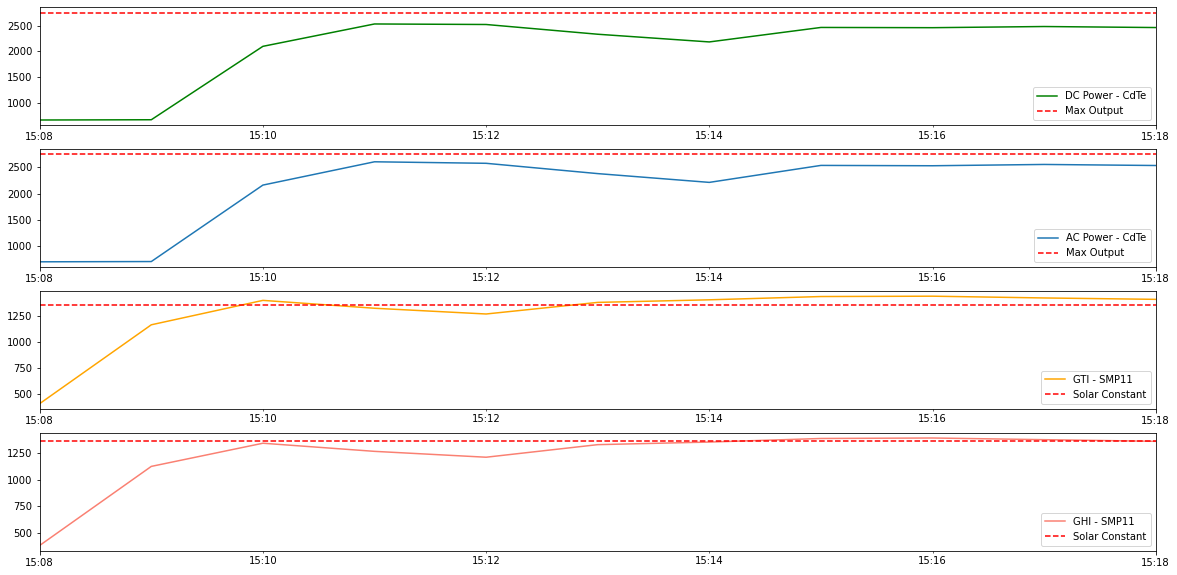

In [102]:
max_out = 2750
sc = 1361.1
figs_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/figs/"


fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

f1= pxir2['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
l1=axes[0].axhline(max_out,color='red',ls='--')
l1.set_label('Max Output')
axes[0].legend(loc='best')

f2= pxir2['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
l2=axes[1].axhline(max_out,color='red',ls='--')
l2.set_label('Max Output')
axes[1].legend(loc='best')

f3 = pxir2['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
l3=axes[2].axhline(sc,color='red',ls='--')
l3.set_label('Solar Constant')
axes[2].legend(loc='best')

f4 = pxir2['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
l4=axes[3].axhline(sc,color='red',ls='--')
l4.set_label('Solar Constant')
axes[3].legend(loc='best')

figname =  figs_path +  'CdTe.jpeg'
fig.savefig(figname)


In [87]:
oie = start

In [103]:
delta = 30


In [106]:
s = str(delta)

In [107]:
s

'30'

In [108]:
deltas = [5,30]

### PLOTS:

max_out = 2750
sc = 1361.1


In [109]:
pxir = pd.read_pickle(inv_path  + 'PowervsIrrad.pkl')


In [110]:
pxir

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.823333,0,-2.200000,1
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.183333,1
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.185000,1
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.890000,0,-2.246667,1
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.105000,0,-2.650000,1
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.770000,3
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.776667,3
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.103333,0,-4.793333,3
2020-12-31 23:58:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.800000,3


In [113]:
oielist = ['2020-01-10 14:52:00+00:00',	
           '2020-01-10 14:50:00+00:00',
           '2020-11-19 15:42:00+00:00']	
	
    


deltas = [5,30]

In [114]:
for oie in oielist:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [115]:

oielist = ['2019-02-05 14:25:00+00:00',	
           '2018-11-24 13:24:00+00:00',
           '2019-03-14 15:07:00+00:00']	#inverter worst eff  

In [116]:
for oie in oielist:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [118]:
oiee = pxir[pxir.TGIP_SMP11_VENT > sc]

In [119]:
oiee

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-11 15:46:00+00:00,1340.675,1301.710,1404.765,1361.864,1207.665,1171.4350,1443.550000,0,1533.716667,0
2018-01-11 15:47:00+00:00,1572.091,1524.176,1717.460,1667.643,1405.829,1363.6540,1403.716667,0,1497.266667,0
2018-01-11 15:48:00+00:00,2177.863,2112.527,2049.062,1982.278,1563.125,1515.6570,1450.166667,0,1563.933333,0
2018-01-11 15:54:00+00:00,1172.384,1137.212,1245.289,1207.930,1007.792,977.4946,1510.016667,0,1619.900000,0
2018-01-11 15:55:00+00:00,1190.558,1154.841,1295.557,1256.690,1061.538,1029.1820,1452.233333,0,1565.416667,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-17 17:06:00+00:00,2296.093,2224.701,2350.216,2279.899,2118.950,2055.3820,1366.866667,0,1466.500000,0
2020-12-24 16:10:00+00:00,2037.092,1976.920,2079.933,2023.259,2123.188,2059.3650,1467.416667,0,1550.816667,0
2020-12-25 13:28:00+00:00,2488.315,2413.666,2540.271,2464.253,2545.798,2469.4240,1364.366667,0,1476.483333,0
2020-12-25 13:29:00+00:00,2485.728,2411.156,2565.307,2489.360,2529.635,2453.8410,1379.366667,0,1489.133333,0


In [120]:
oiee['effcdt'] = oiee.Paccdt / oiee.Pdccdt

<ipython-input-120-46fe2dce4433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['effcdt'] = oiee.Paccdt / oiee.Pdccdt


In [121]:
oiee

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt
2018-01-11 15:46:00+00:00,1340.675,1301.710,1404.765,1361.864,1207.665,1171.4350,1443.550000,0,1533.716667,0,0.970936
2018-01-11 15:47:00+00:00,1572.091,1524.176,1717.460,1667.643,1405.829,1363.6540,1403.716667,0,1497.266667,0,0.969521
2018-01-11 15:48:00+00:00,2177.863,2112.527,2049.062,1982.278,1563.125,1515.6570,1450.166667,0,1563.933333,0,0.970000
2018-01-11 15:54:00+00:00,1172.384,1137.212,1245.289,1207.930,1007.792,977.4946,1510.016667,0,1619.900000,0,0.970000
2018-01-11 15:55:00+00:00,1190.558,1154.841,1295.557,1256.690,1061.538,1029.1820,1452.233333,0,1565.416667,0,0.970000
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-17 17:06:00+00:00,2296.093,2224.701,2350.216,2279.899,2118.950,2055.3820,1366.866667,0,1466.500000,0,0.968907
2020-12-24 16:10:00+00:00,2037.092,1976.920,2079.933,2023.259,2123.188,2059.3650,1467.416667,0,1550.816667,0,0.970462
2020-12-25 13:28:00+00:00,2488.315,2413.666,2540.271,2464.253,2545.798,2469.4240,1364.366667,0,1476.483333,0,0.970000
2020-12-25 13:29:00+00:00,2485.728,2411.156,2565.307,2489.360,2529.635,2453.8410,1379.366667,0,1489.133333,0,0.970000


In [122]:
oiee['effcdta'] = oiee.Paccdta / oiee.Pdccdta

<ipython-input-122-6d7856e4c9b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['effcdta'] = oiee.Paccdta / oiee.Pdccdta


In [123]:
oiee['effpsi'] = oiee.Pacpsi / oiee.Pdcpsi

<ipython-input-123-2d0355c87ab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['effpsi'] = oiee.Pacpsi / oiee.Pdcpsi


<AxesSubplot:>

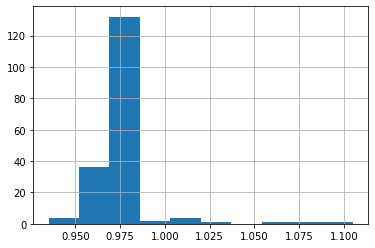

In [124]:
oiee['effcdt'].hist()

Text(0.5, 0, 'CdTe Inverter Efficiency - 2018 ')

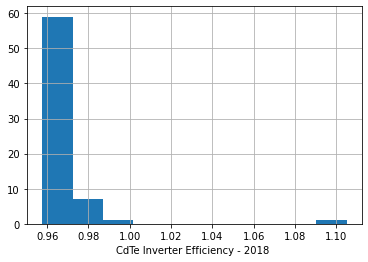

In [397]:
oiee['effcdt'].loc['2018'].hist() #bins = [0.9,0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08,1.10])
plt.xlabel('CdTe Inverter Efficiency - 2018 ')


Text(0.5, 0, 'CdTe Inverter Efficiency - 2019 ')

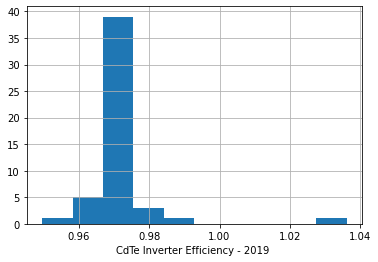

In [398]:
oiee['effcdt'].loc['2019'].hist()#(bins = [0.9,0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08,1.10])
plt.xlabel('CdTe Inverter Efficiency - 2019 ')


Text(0.5, 0, 'CdTe Inverter Efficiency - 2020 ')

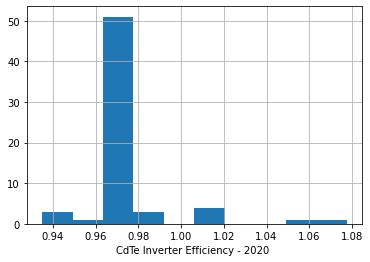

In [400]:
oiee['effcdt'].loc['2020'].hist() #(bins = [0.9,0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08,1.10])
plt.xlabel('CdTe Inverter Efficiency - 2020 ')


<AxesSubplot:>

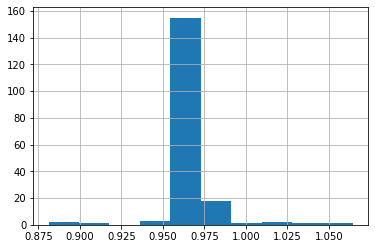

In [125]:
oiee['effcdta'].hist()

Text(0.5, 0, 'CdTe ARC Inv Efficiency - 2018 ')

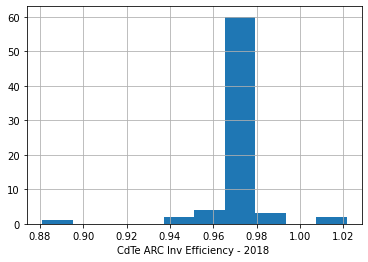

In [401]:
oiee['effcdta'].loc['2018'].hist()#bins = [0.86,0.88,0.9,0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08])
plt.xlabel('CdTe ARC Inv Efficiency - 2018 ')

Text(0.5, 0, 'CdTe ARC Inv Efficiency - 2019 ')

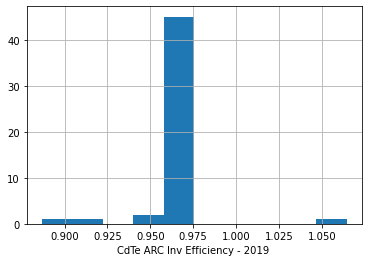

In [402]:
oiee['effcdta'].loc['2019'].hist()#(bins = [0.86,0.88,0.9,0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08])
plt.xlabel('CdTe ARC Inv Efficiency - 2019 ')

Text(0.5, 0, 'CdTe ARC Inv Efficiency - 2020 ')

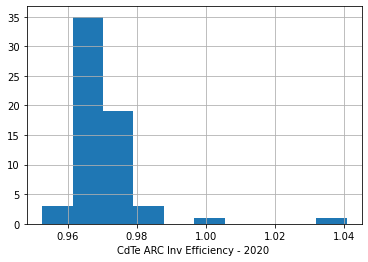

In [403]:
oiee['effcdta'].loc['2020'].hist()#bins = [0.86,0.88,0.9,0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08])
plt.xlabel('CdTe ARC Inv Efficiency - 2020 ')

In [415]:
oiee[oiee['effcdta'] ==oiee['effcdta'].min()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2018-03-03 15:11:00+00:00,1744.651,1695.324,2233.558,1967.984,1695.19,1645.8,1363.533333,0,1268.483333,0,0.971727,0.881098,0.970865,0.088855,0.113755,0.075347


In [416]:
oiee[oiee['effcdt'] ==oiee['effcdt'].min()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2020-10-16 13:56:00+00:00,1939.461,1813.395,1778.091,1745.116,1566.623,1526.556,1392.233333,0,1341.65,0,0.934999,0.981455,0.974425,0.09674,0.088691,0.068198


In [417]:
oiee[oiee['effpsi'] ==oiee['effpsi'].min()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2020-11-03 14:35:00+00:00,2025.353,1965.721,1543.567,1500.872,2018.521,1911.122,1375.933333,0,1359.116667,0,0.970557,0.97234,0.946793,0.102221,0.077905,0.08891


<AxesSubplot:>

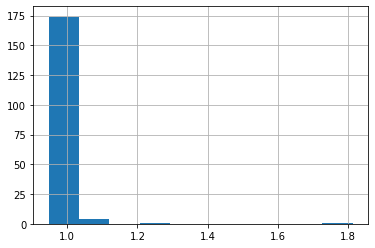

In [126]:
oiee['effpsi'].hist()

Text(0.5, 0, 'mc-Si Inverter Efficiency - 2018 ')

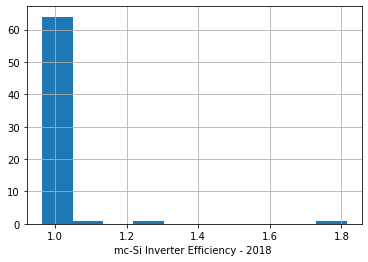

In [410]:
oiee['effpsi'].loc['2018'].hist() #bins = [0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08,1.10])
plt.xlabel('mc-Si Inverter Efficiency - 2018 ')

Text(0.5, 0, 'mc-Si Inverter Efficiency - 2019 ')

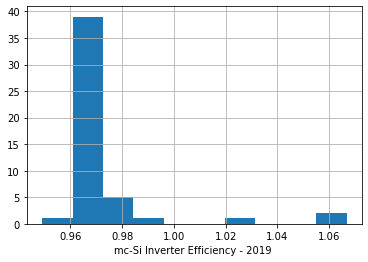

In [405]:
oiee['effpsi'].loc['2019'].hist()#bins = [0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08,1.10])
plt.xlabel('mc-Si Inverter Efficiency - 2019 ')

Text(0.5, 0, 'mc-Si Inverter Efficiency - 2020 ')

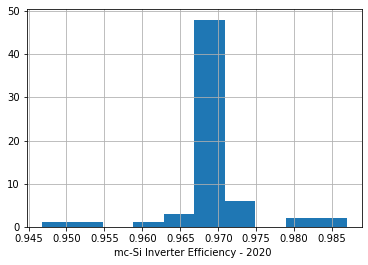

In [407]:
oiee['effpsi'].loc['2020'].hist() #bins = [0.92,0.94,0.96,0.98, 1,1.02,1.04,1.06,1.08,1.10])
plt.xlabel('mc-Si Inverter Efficiency - 2020 ')

In [129]:
oiee[oiee['effpsi']>1]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi
2018-02-08 15:06:00+00:00,1808.553,1751.536,2662.063,2582.201,1644.2040,1721.069,1435.666667,0,1445.783333,0,0.968474,0.970000,1.046749
2018-03-01 15:17:00+00:00,1046.844,1015.439,1064.036,1032.620,821.4548,1046.390,1369.640625,0,1314.750000,0,0.970000,0.970475,1.273825
2018-11-09 14:57:00+00:00,2573.042,2499.867,1926.031,1868.250,981.5105,1780.724,1377.300000,0,1429.933333,0,0.971561,0.970000,1.814269
2018-11-09 15:56:00+00:00,1724.731,1672.989,1839.251,1762.571,1902.6840,2066.312,1363.350000,0,1409.783333,0,0.970000,0.958309,1.085999
2019-02-02 14:40:00+00:00,1814.245,1770.985,2203.714,2143.104,1676.4640,1781.743,1376.133333,0,1407.350000,0,0.976155,0.972496,1.062798
2019-03-29 14:32:00+00:00,1384.203,1338.097,1820.083,1756.500,1704.7830,1818.581,1397.550000,0,1233.383333,0,0.966691,0.965066,1.066752
2019-03-29 16:00:00+00:00,1847.877,1792.441,1939.853,1876.346,1902.6840,1949.489,1391.850000,0,1246.950000,0,0.970000,0.967262,1.024599


In [130]:
oiee[oiee['effcdt']>1]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi
2018-03-01 14:52:00+00:00,1997.4120,2207.1350,1710.6790,1626.9780,2176.605,2100.791,1408.366667,0,1330.183333,0,1.104997,0.951071,0.965169
2019-03-29 15:25:00+00:00,1922.0620,1991.4440,2501.0210,2425.9910,2443.825,2370.510,1411.133333,0,1252.496667,0,1.036098,0.970000,0.970000
2020-01-19 15:23:00+00:00,1882.8030,2028.5840,0.0000,0.0000,1979.688,1950.764,1397.166667,0,1440.216667,0,1.077428,NaN,0.985390
2020-10-17 14:29:00+00:00,957.0071,972.9033,985.9271,956.3494,1191.436,1155.693,1384.900000,0,1364.583333,0,1.016610,0.970000,0.970000
2020-11-03 13:51:00+00:00,2107.3540,2142.2640,1842.1200,1847.3170,1935.077,1862.366,1383.850000,0,1370.016667,0,1.016566,1.002821,0.962425
2020-11-03 14:16:00+00:00,1655.7200,1754.0770,1563.5680,1535.4970,1237.659,1204.735,1375.150000,0,1374.133333,0,1.059404,0.982047,0.973398
2020-11-12 14:56:00+00:00,2162.6960,2201.8650,1918.6960,1861.1360,1550.509,1503.994,1368.300000,0,1361.733333,0,1.018111,0.970000,0.970000
2020-11-23 14:56:00+00:00,1343.1330,1360.9960,1837.0670,1781.9550,1321.990,1282.330,1366.750000,0,1445.833333,0,1.013300,0.970000,0.970000


In [131]:
oiee[oiee['effcdta']>1]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi
2018-03-03 15:10:00+00:00,1640.779,1591.556,2152.365,2198.569,1517.395,1480.540,1397.433333,0,1296.633333,0,0.970000,1.021467,0.975712
2018-12-07 15:23:00+00:00,1587.133,1541.994,2202.475,2226.775,1727.780,1678.878,1370.366667,0,1445.870000,0,0.971559,1.011033,0.971697
2019-03-29 15:37:00+00:00,2172.365,2107.006,2320.159,2469.628,2013.462,1953.058,1386.233333,0,1218.833333,0,0.969913,1.064422,0.970000
2020-10-16 13:38:00+00:00,1772.333,1717.470,1580.590,1645.066,1588.849,1568.046,1435.500000,0,1398.000000,0,0.969045,1.040792,0.986907
2020-11-03 13:51:00+00:00,2107.354,2142.264,1842.120,1847.317,1935.077,1862.366,1383.850000,0,1370.016667,0,1.016566,1.002821,0.962425


oiee[oiee['effcdta']<0.95]

In [412]:
oiee[oiee['effcdta']<0.95]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2018-01-16 15:03:00+00:00,1294.883,1256.037,1114.239,1055.008,955.8201,927.1455,1371.765957,0,1432.553191,0,0.970000,0.946842,0.970000,0.065552,0.056407,0.042229
2018-03-03 15:11:00+00:00,1744.651,1695.324,2233.558,1967.984,1695.1900,1645.8000,1363.533333,0,1268.483333,0,0.971727,0.881098,0.970865,0.088855,0.113755,0.075347
2019-01-25 16:39:00+00:00,2310.969,2240.260,2517.451,2302.477,2703.1600,2622.0650,1364.050000,0,1418.400000,0,0.969403,0.914606,0.970000,0.117653,0.128165,0.120104
2019-11-24 14:25:00+00:00,1451.726,1408.175,2143.470,1901.074,2484.9560,2410.4070,1395.633333,0,1460.800000,0,0.970001,0.886914,0.970000,0.072236,0.106656,0.107910


In [413]:
oiee[oiee['effcdt']<0.95]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2019-03-23 16:00:00+00:00,1905.117,1809.066,2567.655,2494.673,2570.240,2499.888,1374.383333,0,1238.683333,0,0.949583,0.971576,0.972628,0.096261,0.129738,0.113340
2020-01-10 14:52:00+00:00,2573.560,2417.304,2825.712,2733.352,1398.141,1353.329,1375.283333,0,1453.100000,0,0.939284,0.967314,0.967949,0.129951,0.142683,0.061613
2020-10-16 13:56:00+00:00,1939.461,1813.395,1778.091,1745.116,1566.623,1526.556,1392.233333,0,1341.650000,0,0.934999,0.981455,0.974425,0.096740,0.088691,0.068198
2020-10-30 15:10:00+00:00,2518.197,2360.590,2605.079,2526.927,2591.429,2516.650,1457.616667,0,1424.183333,0,0.937413,0.970000,0.971144,0.119973,0.124112,0.107749


In [414]:
oiee[oiee['effpsi']<0.95]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2019-03-04 16:45:00+00:00,1612.451,1564.077,1389.965,1341.879,1583.953,1503.293,1408.283333,0,1347.883333,0,0.970000,0.965405,0.949077,0.079512,0.068541,0.068166
2020-11-03 14:35:00+00:00,2025.353,1965.721,1543.567,1500.872,2018.521,1911.122,1375.933333,0,1359.116667,0,0.970557,0.972340,0.946793,0.102221,0.077905,0.088910


In [136]:
oiee['etacdt'] = oiee.Pdccdt/(oiee.TGIP_SMP11_VENT*14.4)

<ipython-input-136-350b5b3d1992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['etacdt'] = oiee.Pdccdt/(oiee.TGIP_SMP11_VENT*14.4)


In [137]:
oiee['etacdta'] = oiee.Pdccdta/(oiee.TGIP_SMP11_VENT*14.4) 

<ipython-input-137-5148786ecd6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['etacdta'] = oiee.Pdccdta/(oiee.TGIP_SMP11_VENT*14.4)


In [138]:
oiee['etapsi'] =  oiee.Pdcpsi /(oiee.TGIP_SMP11_VENT*16.5)

<ipython-input-138-c90bfd5f3aab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oiee['etapsi'] =  oiee.Pdcpsi /(oiee.TGIP_SMP11_VENT*16.5)


In [139]:
oiee

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2018-01-11 15:46:00+00:00,1340.675,1301.710,1404.765,1361.864,1207.665,1171.4350,1443.550000,0,1533.716667,0,0.970936,0.969460,0.970000,0.064495,0.067579,0.050703
2018-01-11 15:47:00+00:00,1572.091,1524.176,1717.460,1667.643,1405.829,1363.6540,1403.716667,0,1497.266667,0,0.969521,0.970994,0.970000,0.077774,0.084966,0.060697
2018-01-11 15:48:00+00:00,2177.863,2112.527,2049.062,1982.278,1563.125,1515.6570,1450.166667,0,1563.933333,0,0.970000,0.967408,0.969633,0.104292,0.098124,0.065327
2018-01-11 15:54:00+00:00,1172.384,1137.212,1245.289,1207.930,1007.792,977.4946,1510.016667,0,1619.900000,0,0.970000,0.970000,0.969937,0.053917,0.057270,0.040449
2018-01-11 15:55:00+00:00,1190.558,1154.841,1295.557,1256.690,1061.538,1029.1820,1452.233333,0,1565.416667,0,0.970000,0.970000,0.969520,0.056931,0.061952,0.044301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-17 17:06:00+00:00,2296.093,2224.701,2350.216,2279.899,2118.950,2055.3820,1366.866667,0,1466.500000,0,0.968907,0.970081,0.970000,0.116654,0.119404,0.093953
2020-12-24 16:10:00+00:00,2037.092,1976.920,2079.933,2023.259,2123.188,2059.3650,1467.416667,0,1550.816667,0,0.970462,0.972752,0.969940,0.096404,0.098431,0.087690
2020-12-25 13:28:00+00:00,2488.315,2413.666,2540.271,2464.253,2545.798,2469.4240,1364.366667,0,1476.483333,0,0.970000,0.970075,0.970000,0.126652,0.129296,0.113086
2020-12-25 13:29:00+00:00,2485.728,2411.156,2565.307,2489.360,2529.635,2453.8410,1379.366667,0,1489.133333,0,0.970000,0.970395,0.970038,0.125144,0.129151,0.111146


In [165]:
avgetacdt = oiee[oiee.etacdt > 0].mean()

In [167]:
avgetacdta = oiee[oiee.etacdta > 0].mean()

In [169]:
avgetapsi = oiee[oiee.etapsi > 0].mean()

In [166]:
avgetacdt = avgetacdt.etacdt

Pdccdt               2051.097477
Paccdt               1994.064338
Pdccdta              2089.559703
Paccdta              2026.793627
Pdcpsi               1989.736191
Pacpsi               1941.029894
TGIP_SMP11_VENT      1403.234552
F_TGIP_SMP11_VENT       0.000000
GHIP_SMP11           1390.805045
F_GHIP_SMP11            0.000000
effcdt                  0.972691
effcdta                 0.970075
effpsi                  0.979350
etacdt                  0.101589
etacdta                 0.103493
etapsi                  0.085977
dtype: float64

In [175]:
avgetacdt = avgetacdt.etacdt

In [176]:
avgetacdt

0.10158941837372716

In [179]:
gtimincdt = 2846.8/ (14.4*avgetacdt)


In [180]:
gtimincdt

1946.0141381769322

In [484]:
gtimincdtteo = 2846.8/ (14.4*0.153*0.8)
gtimincdtteo

1615.1506899055921

In [487]:
2846.8/ (14.4*0.123)

1607.271906052394

In [174]:
avgetacdta


0.10464739651838062

In [181]:
gtimincdta = 2846.8/ (14.4*avgetacdta)
gtimincdta

1889.1482351376103

In [483]:
gtimincdtaT = 2846.8/ (14.4*0.153*0.8)
gtimincdtaT

1615.1506899055921

In [486]:
2846.8/ (14.4*0.1245)

1587.9071842927267

In [170]:
avgetapsi

Pdccdt               2026.045661
Paccdt               1969.881331
Pdccdta              2100.302011
Paccdta              2037.149240
Pdcpsi               2036.535165
Pacpsi               1986.576704
TGIP_SMP11_VENT      1403.765688
F_TGIP_SMP11_VENT       0.000000
GHIP_SMP11           1393.093140
F_GHIP_SMP11            0.000000
effcdt                  0.972789
effcdta                 0.970044
effpsi                  0.979260
etacdt                  0.100321
etacdta                 0.103985
etapsi                  0.087983
dtype: float64

In [177]:
avgetapsi = avgetapsi.etapsi

In [178]:
avgetapsi

0.08798322145419384

In [182]:
gtiminpsi = 2846.8/ (14.4*avgetapsi)
gtiminpsi

2246.9561943394956

## gtiminpsiT = 2846.8/ (14.4*0.142)
gtiminpsiT

In [482]:
gtiminpsiT = 2846.8/ (14.4*0.142*0.8)
gtiminpsiT

1740.2679968701098

In [485]:
2846.8/ (14.4*0.11)

1797.2222222222222

<AxesSubplot:xlabel='Pdccdt', ylabel='etacdt'>

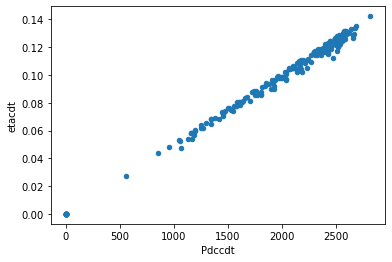

In [147]:
oiee.plot.scatter('Pdccdt', 'etacdt')

<AxesSubplot:xlabel='TGIP_SMP11_VENT', ylabel='etacdt'>

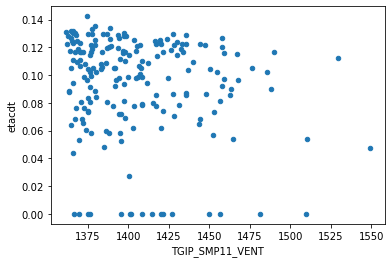

In [148]:
oiee.plot.scatter('TGIP_SMP11_VENT', 'etacdt')

In [149]:
pxir['etacdt']= pxir.Pdccdt/(pxir.TGIP_SMP11_VENT*14.4)

In [154]:
pxir = pxir[pxir.etacdt>0]

In [158]:
pxir = pxir[pxir.etacdt<2]

<AxesSubplot:xlabel='TGIP_SMP11_VENT', ylabel='etacdt'>

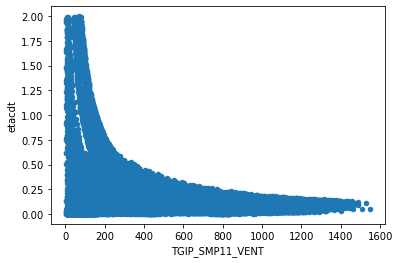

In [159]:
pxir.plot.scatter('TGIP_SMP11_VENT', 'etacdt')

In [186]:
pxir.Paccdt.max()

2737.014

In [190]:
pxir[pxir.Paccdt ==pxir.Paccdt.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-11-19 15:42:00+00:00,2819.724,2737.014,1478.049,1497.457,1363.909,1322.992,945.566667,0,1028.195,0,0.207087


In [202]:
pxir.loc['2020-11-19 15:10:00+00:00':'2020-11-19 16:00:00+00:00']

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-11-19 15:10:00+00:00,415.9463,403.0915,431.8661,419.1631,467.0459,452.4609,202.473333,0,225.636667,0,0.142662
2020-11-19 15:11:00+00:00,404.4983,392.3634,423.0968,410.1194,455.3506,440.1604,208.245000,0,223.420000,0,0.134890
2020-11-19 15:12:00+00:00,409.1875,396.9119,425.0528,411.8585,457.2560,443.5383,220.813333,0,228.638333,0,0.128687
2020-11-19 15:13:00+00:00,429.0111,416.1408,438.5490,425.3925,467.6372,453.6082,224.796667,0,225.323333,0,0.132531
2020-11-19 15:14:00+00:00,442.9492,429.6607,460.6841,446.9268,491.4879,476.7433,223.705000,0,217.570000,0,0.137504
2020-11-19 15:15:00+00:00,444.3721,431.0410,459.6734,445.8833,490.7651,476.0422,214.115000,0,202.200000,0,0.144124
2020-11-19 15:16:00+00:00,428.7524,415.8899,441.3851,428.1436,471.6452,457.4958,197.200000,0,181.250000,0,0.150986
2020-11-19 15:17:00+00:00,398.0306,386.1211,400.7010,388.6800,434.7194,421.6778,168.548333,0,153.608333,0,0.163995
2020-11-19 15:18:00+00:00,345.0272,335.0529,344.6299,334.2910,380.9076,369.4804,139.228333,0,132.218333,0,0.172093
2020-11-19 15:19:00+00:00,269.3544,263.1559,333.4156,323.4132,312.7723,303.3891,122.328333,0,126.751667,0,0.152910


In [191]:
pxir.Paccdta.max()

2741.889

In [192]:
pxir[pxir.Paccdta ==pxir.Paccdta.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-01-10 14:51:00+00:00,2196.619,2093.329,2821.8,2741.889,1439.206,1396.03,883.845,0,929.178333,0,0.17259


In [199]:
pxir.loc['2020-01-10 14:30:00+00:00':'2020-01-10 15:00:00+00:00']

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-01-10 14:30:00+00:00,1617.8830,1568.3430,1885.2820,1729.8750,2124.7650,2061.0220,766.973333,0,815.761667,0,0.146489
2020-01-10 14:31:00+00:00,1712.5070,1655.4850,1297.3170,1258.3980,1566.6070,1519.6090,621.033333,0,675.781667,0,0.191494
2020-01-10 14:32:00+00:00,1608.0520,1544.1270,1742.4960,1690.2210,1349.8490,1313.1770,543.431667,0,586.826667,0,0.205491
2020-01-10 14:33:00+00:00,1116.8260,1083.3210,1231.3360,1194.3960,1177.4410,1144.0290,501.675000,0,546.926667,0,0.154597
2020-01-10 14:34:00+00:00,1069.9340,1037.8360,1100.1560,1067.1510,1039.9870,1010.3170,529.538333,0,572.791667,0,0.140313
2020-01-10 14:35:00+00:00,1024.1430,992.2891,1086.7900,1054.1860,1067.7140,1036.4480,521.138333,0,563.935000,0,0.136472
2020-01-10 14:36:00+00:00,1024.1430,994.9240,1065.8610,1033.3790,1083.8120,1051.2980,486.200000,0,529.228333,0,0.146279
2020-01-10 14:37:00+00:00,1010.2370,980.1807,1008.7470,978.2314,1022.9040,992.2170,493.886667,0,533.500000,0,0.142047
2020-01-10 14:38:00+00:00,984.8185,955.2740,994.3377,964.5076,951.2864,922.7479,471.583333,0,507.973333,0,0.145022
2020-01-10 14:39:00+00:00,912.5090,884.6318,1003.5310,973.4249,993.5344,963.7921,472.693333,0,512.985000,0,0.134059


In [193]:
pxir.Pacpsi.max()

2743.986

In [194]:
pxir[pxir.Pacpsi ==pxir.Pacpsi.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2019-09-23 16:15:00+00:00,1536.584,1487.287,2618.705,2536.982,2821.756,2743.986,946.183333,0,859.941667,0,0.112776


In [200]:
pxir['2019-09-23 16:00:00+00:00':'2019-09-23 16:30:00+00:00']

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2019-09-23 16:00:00+00:00,1621.376,1570.1000,1631.2670,1581.6960,1660.367,1610.556,864.688333,0,796.015000,0,0.130215
2019-09-23 16:01:00+00:00,1722.467,1668.1580,1624.1600,1575.1190,1737.635,1685.506,809.906667,0,750.806667,0,0.147691
2019-09-23 16:02:00+00:00,1676.287,1625.8110,1569.9800,1522.8800,1596.437,1548.990,787.225000,0,727.616667,0,0.147872
2019-09-23 16:03:00+00:00,1510.195,1464.7010,1520.0370,1473.2980,1603.993,1556.638,861.796667,0,795.381667,0,0.121693
2019-09-23 16:04:00+00:00,1548.808,1502.3430,1511.8220,1464.1910,1507.407,1459.126,812.883333,0,754.605000,0,0.132314
2019-09-23 16:05:00+00:00,1561.420,1516.4590,1649.9140,1600.4160,1746.703,1694.301,774.536667,0,723.378333,0,0.139996
2019-09-23 16:06:00+00:00,1460.717,1418.5890,1495.1960,1450.3400,1582.310,1534.841,774.400000,0,727.268333,0,0.130990
2019-09-23 16:07:00+00:00,1503.210,1463.7600,1454.7080,1411.3830,1531.455,1485.512,739.446667,0,696.570000,0,0.141173
2019-09-23 16:08:00+00:00,1493.702,1425.9290,1444.8630,1403.0980,1482.177,1437.712,745.495000,0,701.961667,0,0.139142
2019-09-23 16:09:00+00:00,1369.909,1328.8120,1421.9130,1379.2550,1517.263,1471.745,738.760000,0,695.045000,0,0.128773


In [195]:
oiee[oiee.Paccdt ==oiee.Paccdt.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2018-01-31 15:55:00+00:00,2817.524,2732.999,1643.654,1593.08,2307.817,2275.803,1374.655738,0,1391.704918,0,0.97,0.969231,0.986128,0.142335,0.083034,0.101747


In [196]:
oiee[oiee.Paccdta ==oiee.Paccdta.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2020-01-10 14:52:00+00:00,2573.56,2417.304,2825.712,2733.352,1398.141,1353.329,1375.283333,0,1453.1,0,0.939284,0.967314,0.967949,0.129951,0.142683,0.061613


In [197]:
oiee[oiee.Pacpsi ==oiee.Pacpsi.max()]

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,effcdt,effcdta,effpsi,etacdt,etacdta,etapsi
2020-01-10 14:50:00+00:00,1675.123,1623.928,2011.768,1953.818,2825.304,2739.397,1379.838333,0,1452.771667,0,0.969438,0.971194,0.969594,0.084306,0.101248,0.124095


In [203]:
oielist = ['2020-11-19 15:42:00+00:00',	
           '2020-01-10 14:51:00+00:00',
           '2019-09-23 16:15:00+00:00']   #inverter highest ac power peaks	

In [204]:
for oie in oielist:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['TGIP_SMP11_VENT'].loc[start:end].plot(ax=axes[2],color = 'orange',label='GTI - SMP11')
              l3=axes[2].axhline(sc,color='red',ls='--')
              l3.set_label('Solar Constant')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [205]:
pxir

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-01-01 09:18:00+00:00,0.141575,0.137328,0.248801,0.208871,5.670451,4.225675,23.460000,0,22.366667,0,0.000419
2018-01-01 09:19:00+00:00,2.365055,3.046951,3.639148,3.529974,8.430031,7.858465,24.440000,0,23.553333,0,0.006720
2018-01-01 09:20:00+00:00,8.832820,7.877726,8.463873,8.083471,14.737640,14.295510,25.558333,0,24.875000,0,0.024000
2018-01-01 09:21:00+00:00,9.738307,9.446158,10.550240,10.233740,18.614190,18.055770,25.400000,0,24.745000,0,0.026625
2018-01-01 09:22:00+00:00,10.773150,10.449960,12.049820,11.688320,20.125390,19.521630,25.380000,0,24.265000,0,0.029477
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:41:00+00:00,9.156209,7.752251,12.245410,11.878050,32.642060,31.726530,25.995000,0,23.616667,0,0.024460
2020-12-31 21:42:00+00:00,10.902500,10.575430,13.027800,12.636970,33.331950,32.332000,24.768333,0,22.063333,0,0.030568
2020-12-31 21:43:00+00:00,10.902500,10.230380,13.027800,12.636970,31.557940,30.611200,21.841667,0,19.018333,0,0.034664
2020-12-31 21:44:00+00:00,5.469584,6.434767,7.811882,6.628881,26.498710,25.703750,18.908333,0,15.995000,0,0.020088


In [207]:
oieehighp_cdte = pxir[pxir['Pdccdt']>2750]

In [208]:
oieehighp_cdte

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-01-11 15:58:00+00:00,2777.295,2693.976,2818.409,2738.284,2456.177,2406.265,841.283333,0,890.100000,0,0.229254
2018-01-31 15:55:00+00:00,2817.524,2732.999,1643.654,1593.080,2307.817,2275.803,1374.655738,0,1391.704918,0,0.142335
2018-01-31 15:56:00+00:00,2817.395,2732.873,2814.498,2730.063,1841.514,1786.651,771.757377,0,775.009836,0,0.253515
2018-02-03 16:14:00+00:00,2751.812,2669.258,2638.721,2559.560,2118.654,2073.259,1152.918033,0,1162.049180,0,0.165752
2018-02-08 15:09:00+00:00,2766.171,2683.186,2419.914,2375.143,2033.107,1972.114,1312.550000,0,1309.900000,0,0.146353
2018-10-04 16:05:00+00:00,2765.847,2669.007,2589.561,2510.357,2098.852,2036.166,899.505172,0,869.406897,0,0.213532
2019-01-25 14:58:00+00:00,2811.574,2728.231,2821.801,2737.146,2791.006,2706.766,743.270000,0,755.515000,0,0.262688
2019-02-04 16:02:00+00:00,2809.763,2736.198,2373.492,2302.287,2258.802,2208.883,1170.250000,0,554.495000,0,0.166736
2019-03-04 16:47:00+00:00,2782.275,2698.431,2398.421,2339.727,2447.636,2374.207,1106.816667,0,1073.543333,0,0.174567
2020-01-10 14:24:00+00:00,2775.872,2692.596,2544.444,2466.529,1510.167,1464.862,1103.766667,0,1197.600000,0,0.174646


In [211]:
 oieehighp1_cdte = oieehighp_cdte[oieehighp_cdte['TGIP_SMP11_VENT']> sc ]

In [212]:
 oieehighp1_cdte

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-01-31 15:55:00+00:00,2817.524,2732.999,1643.654,1593.08,2307.817,2275.803,1374.655738,0,1391.704918,0,0.142335


In [213]:
oieehighp_cdteA = pxir[pxir['Pdccdta']>2750]
oieehighp_cdteA.head(50)

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-01-11 15:50:00+00:00,2743.9210,2655.958,2805.370,2721.209,2412.681,2340.301,739.161667,0,786.295000,0,0.257792
2018-01-11 15:51:00+00:00,2668.8950,2584.374,2802.110,2718.047,2502.039,2425.639,564.418333,0,610.748333,0,0.328373
2018-01-11 15:58:00+00:00,2777.2950,2693.976,2818.409,2738.284,2456.177,2406.265,841.283333,0,890.100000,0,0.229254
2018-01-14 16:00:00+00:00,330.4442,0.000,2820.626,2734.616,1986.983,1933.683,1003.183333,0,1028.650000,0,0.022875
2018-01-15 15:23:00+00:00,2672.2590,2592.091,2785.745,2726.079,2232.651,2165.672,1262.833333,0,1340.183333,0,0.146950
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16 14:35:00+00:00,1997.7350,1938.023,2823.365,2735.249,1913.066,1855.674,583.056667,0,622.670000,0,0.237938
2020-12-16 15:57:00+00:00,2167.9670,2114.220,2802.958,2699.612,2555.456,2481.469,913.788333,0,964.256667,0,0.164757
2020-12-21 14:51:00+00:00,2444.3990,2371.067,2819.453,2734.869,2662.883,2576.496,677.460000,0,718.785000,0,0.250568
2020-12-22 15:47:00+00:00,2570.5850,2470.882,2783.457,2700.971,2568.038,2494.790,702.865000,0,719.735000,0,0.253979


In [218]:
oieehighp_cdteA.head(50)

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-01-11 15:50:00+00:00,2743.9210,2655.958,2805.370,2721.209,2412.681,2340.301,739.161667,0,786.295000,0,0.257792
2018-01-11 15:51:00+00:00,2668.8950,2584.374,2802.110,2718.047,2502.039,2425.639,564.418333,0,610.748333,0,0.328373
2018-01-11 15:58:00+00:00,2777.2950,2693.976,2818.409,2738.284,2456.177,2406.265,841.283333,0,890.100000,0,0.229254
2018-01-14 16:00:00+00:00,330.4442,0.000,2820.626,2734.616,1986.983,1933.683,1003.183333,0,1028.650000,0,0.022875
2018-01-15 15:23:00+00:00,2672.2590,2592.091,2785.745,2726.079,2232.651,2165.672,1262.833333,0,1340.183333,0,0.146950
2018-01-15 15:24:00+00:00,2718.6320,2637.638,2771.858,2688.196,2337.187,2266.944,1191.100000,0,1266.100000,0,0.158504
2018-01-17 15:13:00+00:00,2585.0090,2507.458,2754.123,2671.500,2267.869,2200.980,847.593333,0,872.301667,0,0.211793
2018-01-22 14:34:00+00:00,2426.3540,2353.563,2803.936,2718.427,2377.529,2314.170,1282.186441,0,1348.491525,0,0.131414
2018-01-22 14:40:00+00:00,2285.9390,2144.021,2779.551,2734.110,1840.265,1785.057,1085.733333,0,1144.050000,0,0.146211
2018-01-31 14:51:00+00:00,2134.3990,2070.367,2780.725,2697.303,1690.591,1639.873,655.411475,0,659.016393,0,0.226151


In [219]:
oieehighp_cdteA.tail(14)

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2020-10-30 15:08:00+00:00,2054.548,1996.086,2756.797,2673.998,1630.307,1569.639,1196.665000,0,1173.496667,0,0.119229
2020-10-30 15:11:00+00:00,2749.483,2666.999,2761.230,2678.394,2768.272,2685.225,1172.866667,0,1142.683333,0,0.162795
2020-10-31 15:09:00+00:00,2596.327,2516.053,2765.077,2681.366,2685.650,2605.080,1263.183333,0,1269.650000,0,0.142735
2020-11-02 13:46:00+00:00,2741.722,2689.396,2813.650,2729.241,2522.802,2432.459,646.985000,0,678.835000,0,0.294284
2020-11-02 13:47:00+00:00,1982.277,1956.687,2810.455,2726.142,2244.215,2120.740,573.810000,0,594.975000,0,0.239902
2020-11-02 15:55:00+00:00,2305.536,2207.825,2821.018,2736.387,2789.232,2707.977,779.613333,0,793.333333,0,0.205367
2020-11-04 15:23:00+00:00,2620.646,2368.244,2817.106,2732.593,1780.212,1726.805,764.723333,0,772.901667,0,0.237981
2020-11-12 14:29:00+00:00,2624.591,2546.794,2821.409,2736.767,2417.182,2344.475,863.621667,0,899.468333,0,0.211045
2020-12-14 15:16:00+00:00,1569.957,1478.001,2804.588,2720.450,1694.271,1643.442,799.443333,0,848.978333,0,0.136376
2020-12-16 14:35:00+00:00,1997.735,1938.023,2823.365,2735.249,1913.066,1855.674,583.056667,0,622.670000,0,0.237938


In [214]:
oieehighp1_cdteA = oieehighp_cdteA[oieehighp_cdteA['TGIP_SMP11_VENT']> sc ]
oieehighp1_cdteA   

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-11-07 15:23:00+00:00,2416.782,2344.278,2809.608,2725.320,2416.361,2343.870,1379.483333,0,1425.066667,0,0.121663
2018-11-09 14:18:00+00:00,2091.518,2028.772,2791.417,2707.675,1958.665,1902.135,1378.233333,0,1411.016667,0,0.105384
2020-01-10 14:52:00+00:00,2573.560,2417.304,2825.712,2733.352,1398.141,1353.329,1375.283333,0,1453.100000,0,0.129951


In [215]:
oieehighp_psi = pxir[pxir['Pdcpsi']>2750]
oieehighp_psi

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-11-07 15:11:00+00:00,2396.473,2300.613,2736.650,2645.318,2823.530,2738.824,933.491667,0,963.618333,0,0.178279
2018-11-07 15:24:00+00:00,2663.527,2583.621,2701.704,2625.333,2821.296,2736.657,1070.276667,0,1102.155000,0,0.172822
2018-11-09 14:31:00+00:00,1292.943,1254.155,1240.333,1196.167,2772.215,2671.139,591.100000,0,607.413333,0,0.151899
2018-11-09 14:38:00+00:00,1975.705,2027.957,2182.133,2116.669,2808.221,2723.974,1341.583333,0,1379.866667,0,0.102269
2018-11-24 13:24:00+00:00,2593.417,2515.614,2793.047,2584.478,2765.776,2689.176,1208.833333,0,1272.316667,0,0.148985
2019-01-25 14:58:00+00:00,2811.574,2728.231,2821.801,2737.146,2791.006,2706.766,743.270000,0,755.515000,0,0.262688
2019-01-25 16:40:00+00:00,2653.632,2575.779,2764.881,2679.848,2751.321,2668.399,1317.483333,0,1362.783333,0,0.139873
2019-02-02 15:21:00+00:00,2124.698,2060.957,2598.298,2520.349,2812.688,2728.691,1408.000000,0,1447.650000,0,0.104793
2019-02-28 16:24:00+00:00,2475.444,2401.181,2710.962,2630.139,2755.920,2674.008,1277.750000,0,1203.383333,0,0.134538
2019-03-14 15:07:00+00:00,2260.909,2218.114,2586.758,2511.748,2824.516,2613.907,1069.183333,0,997.150000,0,0.146848


In [216]:
oieehighp_psi.shape

(45, 11)

In [217]:
oieehighp1_psi = oieehighp_psi[oieehighp_psi['TGIP_SMP11_VENT']> sc ]
oieehighp1_psi  

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2019-02-02 15:21:00+00:00,2124.698,2060.957,2598.298,2520.349,2812.688,2728.691,1408.000000,0,1447.650000,0,0.104793
2020-01-10 14:50:00+00:00,1675.123,1623.928,2011.768,1953.818,2825.304,2739.397,1379.838333,0,1452.771667,0,0.084306
2020-10-31 15:04:00+00:00,1769.488,1721.579,1597.363,1551.150,2766.104,2683.121,1427.783333,0,1439.716667,0,0.086064


In [258]:
pxir.corr()

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
Pdccdt,1.000000,0.999880,0.973303,0.973425,0.885798,0.885784,0.938032,NaN,0.924174,-0.000149,0.293066
Paccdt,0.999880,1.000000,0.973233,0.973360,0.885806,0.885793,0.938115,NaN,0.924258,-0.000147,0.292839
Pdccdta,0.973303,0.973233,1.000000,0.999874,0.874529,0.874629,0.926460,NaN,0.915292,0.000013,0.276843
Paccdta,0.973425,0.973360,0.999874,1.000000,0.874481,0.874581,0.926537,NaN,0.915374,0.000003,0.276887
Pdcpsi,0.885798,0.885806,0.874529,0.874481,1.000000,0.999904,0.855620,NaN,0.838002,-0.000167,0.216329
Pacpsi,0.885784,0.885793,0.874629,0.874581,0.999904,1.000000,0.855696,NaN,0.838108,-0.000170,0.216323
TGIP_SMP11_VENT,0.938032,0.938115,0.926460,0.926537,0.855620,0.855696,1.000000,NaN,0.965012,0.000955,0.076952
F_TGIP_SMP11_VENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHIP_SMP11,0.924174,0.924258,0.915292,0.915374,0.838002,0.838108,0.965012,NaN,1.000000,0.000666,0.101196
F_GHIP_SMP11,-0.000149,-0.000147,0.000013,0.000003,-0.000167,-0.000170,0.000955,NaN,0.000666,1.000000,0.003011


In [285]:
dfshift = pd.DataFrame(columns = ['Pdccdt','ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])


In [286]:
dfshift['Pdccdt'] = pxir['Pdccdt']

In [287]:
dfshift

,Pdccdt,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
2018-01-01 09:18:00+00:00,0.141575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 09:19:00+00:00,2.365055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 09:20:00+00:00,8.832820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 09:21:00+00:00,9.738307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 09:22:00+00:00,10.773150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:41:00+00:00,9.156209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 21:42:00+00:00,10.902500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 21:43:00+00:00,10.902500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 21:44:00+00:00,5.469584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
dfshift['ghi']=pxir['GHIP_SMP11']

In [289]:
dfshift.loc[:,'ghi1']= dfshift.ghi.shift(1)
dfshift.loc[:,'ghi2']= dfshift.ghi.shift(2)
dfshift.loc[:,'ghi3']= dfshift.ghi.shift(3)
dfshift.loc[:,'ghi4']= dfshift.ghi.shift(4)
dfshift.loc[:,'ghi5']= dfshift.ghi.shift(5)
dfshift.loc[:,'ghi-1']= dfshift.ghi.shift(-1)
dfshift.loc[:,'ghi-2']= dfshift.ghi.shift(-2)
dfshift.loc[:,'ghi-3']= dfshift.ghi.shift(-3)
dfshift.loc[:,'ghi-4']= dfshift.ghi.shift(-4)
dfshift.loc[:,'ghi-5']= dfshift.ghi.shift(-5)

In [290]:
dfshift

,Pdccdt,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
2018-01-01 09:18:00+00:00,0.141575,25.938333,24.265000,24.745000,24.875000,23.553333,22.366667,NaN,NaN,NaN,NaN,NaN
2018-01-01 09:19:00+00:00,2.365055,28.993333,25.938333,24.265000,24.745000,24.875000,23.553333,22.366667,NaN,NaN,NaN,NaN
2018-01-01 09:20:00+00:00,8.832820,32.338333,28.993333,25.938333,24.265000,24.745000,24.875000,23.553333,22.366667,NaN,NaN,NaN
2018-01-01 09:21:00+00:00,9.738307,35.826667,32.338333,28.993333,25.938333,24.265000,24.745000,24.875000,23.553333,22.366667,NaN,NaN
2018-01-01 09:22:00+00:00,10.773150,39.911667,35.826667,32.338333,28.993333,25.938333,24.265000,24.745000,24.875000,23.553333,22.366667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:41:00+00:00,9.156209,NaN,13.696667,15.995000,19.018333,22.063333,23.616667,24.613333,23.930000,22.205000,20.875000,20.790000
2020-12-31 21:42:00+00:00,10.902500,NaN,NaN,13.696667,15.995000,19.018333,22.063333,23.616667,24.613333,23.930000,22.205000,20.875000
2020-12-31 21:43:00+00:00,10.902500,NaN,NaN,NaN,13.696667,15.995000,19.018333,22.063333,23.616667,24.613333,23.930000,22.205000
2020-12-31 21:44:00+00:00,5.469584,NaN,NaN,NaN,NaN,13.696667,15.995000,19.018333,22.063333,23.616667,24.613333,23.930000


In [291]:
dfshift.corr()

,Pdccdt,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
Pdccdt,1.000000,0.889126,0.893894,0.899304,0.905591,0.913465,0.924174,0.940208,0.941125,0.930693,0.919877,0.909152
ghi-5,0.889126,1.000000,0.980162,0.963736,0.953121,0.944995,0.938142,0.932033,0.926838,0.921932,0.917238,0.912892
ghi-4,0.893894,0.980162,1.000000,0.980162,0.963736,0.953121,0.944996,0.938142,0.932033,0.926838,0.921932,0.917238
ghi-3,0.899304,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033,0.926838,0.921932
ghi-2,0.905591,0.953121,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033,0.926838
ghi-1,0.913465,0.944995,0.953121,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033
ghi,0.924174,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142
ghi1,0.940208,0.932033,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736,0.953121,0.944995
ghi2,0.941125,0.926838,0.932033,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736,0.953121
ghi3,0.930693,0.921932,0.926838,0.932033,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736


In [293]:
dfshiftA = pd.DataFrame(columns = ['Pdccdta', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])

dfshiftA['Pdccdta'] = pxir['Pdccdta']
dfshiftA['ghi']=pxir['GHIP_SMP11']
dfshiftA.loc[:,'ghi1']= dfshiftA.ghi.shift(1)
dfshiftA.loc[:,'ghi2']= dfshiftA.ghi.shift(2)
dfshiftA.loc[:,'ghi3']= dfshiftA.ghi.shift(3)
dfshiftA.loc[:,'ghi4']= dfshiftA.ghi.shift(3)
dfshiftA.loc[:,'ghi5']= dfshiftA.ghi.shift(3)
dfshiftA.loc[:,'ghi-1']= dfshiftA.ghi.shift(-1)
dfshiftA.loc[:,'ghi-2']= dfshiftA.ghi.shift(-2)
dfshiftA.loc[:,'ghi-3']= dfshiftA.ghi.shift(-3)
dfshiftA.loc[:,'ghi-4']= dfshiftA.ghi.shift(-3)
dfshiftA.loc[:,'ghi-5']= dfshiftA.ghi.shift(-3)


In [294]:
dfshiftA.corr()

,Pdccdta,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
Pdccdta,1.000000,0.889835,0.889835,0.889835,0.896187,0.904220,0.915292,0.931378,0.932531,0.922421,0.922421,0.922421
ghi-5,0.889835,1.000000,1.000000,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033,0.932033,0.932033
ghi-4,0.889835,1.000000,1.000000,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033,0.932033,0.932033
ghi-3,0.889835,1.000000,1.000000,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033,0.932033,0.932033
ghi-2,0.896187,0.980162,0.980162,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.938142,0.938142
ghi-1,0.904220,0.963736,0.963736,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.944996,0.944996
ghi,0.915292,0.953122,0.953122,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.953122,0.953122
ghi1,0.931378,0.944996,0.944996,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736,0.963736,0.963736
ghi2,0.932531,0.938142,0.938142,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.980162,0.980162
ghi3,0.922421,0.932033,0.932033,0.932033,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,1.000000,1.000000


In [295]:
dfshiftpsi = pd.DataFrame(columns = ['Pdcpsi', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftpsi['Pdcpsi'] = pxir['Pdcpsi']
dfshiftpsi['ghi']=pxir['GHIP_SMP11']
dfshiftpsi.loc[:,'ghi1']= dfshiftpsi.ghi.shift(1)
dfshiftpsi.loc[:,'ghi2']= dfshiftpsi.ghi.shift(2)
dfshiftpsi.loc[:,'ghi3']= dfshiftpsi.ghi.shift(3)
dfshiftpsi.loc[:,'ghi4']= dfshiftpsi.ghi.shift(4)
dfshiftpsi.loc[:,'ghi5']= dfshiftpsi.ghi.shift(5)
dfshiftpsi.loc[:,'ghi-1']= dfshiftpsi.ghi.shift(-1)
dfshiftpsi.loc[:,'ghi-2']= dfshiftpsi.ghi.shift(-2)
dfshiftpsi.loc[:,'ghi-3']= dfshiftpsi.ghi.shift(-3)
dfshiftpsi.loc[:,'ghi-4']= dfshiftpsi.ghi.shift(-4)
dfshiftpsi.loc[:,'ghi-5']= dfshiftpsi.ghi.shift(-5)

In [296]:
dfshiftpsi.corr()

,Pdcpsi,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
Pdcpsi,1.000000,0.804807,0.809513,0.814756,0.820637,0.827773,0.838002,0.852901,0.853394,0.842869,0.832916,0.823299
ghi-5,0.804807,1.000000,0.980162,0.963736,0.953121,0.944995,0.938142,0.932033,0.926838,0.921932,0.917238,0.912892
ghi-4,0.809513,0.980162,1.000000,0.980162,0.963736,0.953121,0.944996,0.938142,0.932033,0.926838,0.921932,0.917238
ghi-3,0.814756,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033,0.926838,0.921932
ghi-2,0.820637,0.953121,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033,0.926838
ghi-1,0.827773,0.944995,0.953121,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142,0.932033
ghi,0.838002,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736,0.953122,0.944996,0.938142
ghi1,0.852901,0.932033,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736,0.953121,0.944995
ghi2,0.853394,0.926838,0.932033,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736,0.953121
ghi3,0.842869,0.921932,0.926838,0.932033,0.938142,0.944996,0.953122,0.963736,0.980162,1.000000,0.980162,0.963736


In [311]:
C1 = dfshift.corr()
C2 = dfshiftA.corr()
C3 = dfshiftpsi.corr()

In [312]:
C1 = C1.iloc[0,:]


In [313]:
C1 = C1.iloc[1:12]

In [314]:
C1

ghi-5    0.889126
ghi-4    0.893894
ghi-3    0.899304
ghi-2    0.905591
ghi-1    0.913465
ghi      0.924174
ghi1     0.940208
ghi2     0.941125
ghi3     0.930693
ghi4     0.919877
ghi5     0.909152
Name: Pdccdt, dtype: float64

In [315]:
C2 = C2.iloc[0,:]
C3 = C3.iloc[0,:]

In [316]:
C2 = C2.iloc[1:12]
C3 = C3.iloc[1:12]

In [319]:
C2

-5    0.889835
-4    0.889835
-3    0.889835
-2    0.896187
-1    0.904220
 0    0.915292
 1    0.931378
 2    0.932531
 3    0.922421
 4    0.922421
 5    0.922421
Name: Pdccdta, dtype: float64

In [318]:
C2.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

In [320]:
C1.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
C3.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

Text(0.5, 1.0, 'SMP11')

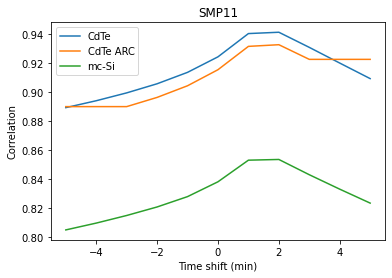

In [361]:
f1 = C1.plot(label = 'CdTe')
f2 = C2.plot(label = 'CdTe ARC')
f3 = C3.plot(label = 'mc-Si')
plt.xlabel("Time shift (min)")
plt.ylabel("Correlation")
plt.legend(loc = 'best')
plt.title('SMP11')


In [329]:
GHIsensor2 = ['GHIP_SI02pt100',
             'F_GHIP_SI02pt100']


dfghi18b = pd.read_pickle(ghi_path + '2018' +'ghiFLAG.pkl')
dfghi19b = pd.read_pickle(ghi_path + '2019' +'ghiFLAG.pkl')
dfghi20b = pd.read_pickle(ghi_path + '2020' +'ghiFLAG.pkl')
dfghisb = [dfghi18b[GHIsensor2], dfghi19b[GHIsensor2], dfghi20b[GHIsensor2]]
dfghisb = pd.concat(dfghisb)       
dfghisb.index.drop_duplicates()
pxirb = pd.merge(pvsi,dfghisb, how = 'left', left_index = True, right_index = True)


,Paccdt,Pdccdt,Paccdta,Pdccdta,Pacpsi,Pdcpsi,GHIP_SI02pt100,F_GHIP_SI02pt100
TIMESTAMP,,,,,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.006883,0.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.006883,0.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.010817,0.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.001967,0.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.000983,0.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [335]:

              
              start = '2020-01-10 14:21:00+00:00'
              end   = '2020-01-10 15:21:00+00:00'

              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path + '2020-01-10 14:51:00+00:00' + 'd30' + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path  + '2020-01-10 14:51:00+00:00' + 'd30' + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')


              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path  + '2020-01-10 14:51:00+00:00' + 'd30' + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [336]:
              start = '2020-01-10 14:46:00+00:00'
              end   = '2020-01-10 14:56:00+00:00'

              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path + '2020-01-10 14:51:00+00:00' + 'd5' + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path  + '2020-01-10 14:51:00+00:00' + 'd5' + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')


              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path  + '2020-01-10 14:51:00+00:00' + 'd5' + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [340]:

dfshiftb = pd.DataFrame(columns = ['Pdccdta', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftb['ghi']=pxirb['GHIP_SI02pt100']
dfshiftb.loc[:,'ghi1']= dfshiftb.ghi.shift(1)
dfshiftb.loc[:,'ghi2']= dfshiftb.ghi.shift(2)
dfshiftb.loc[:,'ghi3']= dfshiftb.ghi.shift(3)
dfshiftb.loc[:,'ghi4']= dfshiftb.ghi.shift(4)
dfshiftb.loc[:,'ghi5']= dfshiftb.ghi.shift(5)
dfshiftb.loc[:,'ghi-1']= dfshiftb.ghi.shift(-1)
dfshiftb.loc[:,'ghi-2']= dfshiftb.ghi.shift(-2)
dfshiftb.loc[:,'ghi-3']= dfshiftb.ghi.shift(-3)
dfshiftb.loc[:,'ghi-4']= dfshiftb.ghi.shift(-4)
dfshiftb.loc[:,'ghi-5']= dfshiftb.ghi.shift(-5)
dfshiftb.corr()

dfshiftAb = pd.DataFrame(columns = ['Pdccdta', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftAb['Pdccdta'] = pxirb['Pdccdta']
dfshiftAb['ghi']= pxirb['GHIP_SI02pt100']
dfshiftAb.loc[:,'ghi1']= dfshiftAb.ghi.shift(1)
dfshiftAb.loc[:,'ghi2']= dfshiftAb.ghi.shift(2)
dfshiftAb.loc[:,'ghi3']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi4']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi5']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi-1']= dfshiftAb.ghi.shift(-1)
dfshiftAb.loc[:,'ghi-2']= dfshiftAb.ghi.shift(-2)
dfshiftAb.loc[:,'ghi-3']= dfshiftAb.ghi.shift(-3)
dfshiftAb.loc[:,'ghi-4']= dfshiftAb.ghi.shift(-3)
dfshiftAb.loc[:,'ghi-5']= dfshiftAb.ghi.shift(-3)

dfshiftpsib = pd.DataFrame(columns = ['Pdcpsi', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftpsib['Pdcpsi'] = pxirb['Pdcpsi']
dfshiftpsib['ghi']=pxirb['GHIP_SI02pt100']
dfshiftpsib.loc[:,'ghi1']= dfshiftpsib.ghi.shift(1)
dfshiftpsib.loc[:,'ghi2']= dfshiftpsib.ghi.shift(2)
dfshiftpsib.loc[:,'ghi3']= dfshiftpsib.ghi.shift(3)
dfshiftpsib.loc[:,'ghi4']= dfshiftpsib.ghi.shift(4)
dfshiftpsib.loc[:,'ghi5']= dfshiftpsib.ghi.shift(5)
dfshiftpsib.loc[:,'ghi-1']= dfshiftpsib.ghi.shift(-1)
dfshiftpsib.loc[:,'ghi-2']= dfshiftpsib.ghi.shift(-2)
dfshiftpsib.loc[:,'ghi-3']= dfshiftpsib.ghi.shift(-3)
dfshiftpsib.loc[:,'ghi-4']= dfshiftpsib.ghi.shift(-4)
dfshiftpsib.loc[:,'ghi-5']= dfshiftpsib.ghi.shift(-5)

In [349]:
dfshiftb


,Pdccdta,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
TIMESTAMP,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,NaN,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:01:00+00:00,NaN,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN,NaN
2018-01-01 00:02:00+00:00,NaN,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN
2018-01-01 00:03:00+00:00,NaN,-0.005900,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN
2018-01-01 00:04:00+00:00,NaN,-0.013767,-0.005900,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,NaN,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983
2020-12-31 23:56:00+00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000,0.000000
2020-12-31 23:57:00+00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000


In [351]:

dfshiftb = pd.DataFrame(columns = ['Pdccdt', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftb['Pdccdt'] = pxirb['Pdccdt']
dfshiftb['ghi']=pxirb['GHIP_SI02pt100']
dfshiftb.loc[:,'ghi1']= dfshiftb.ghi.shift(1)
dfshiftb.loc[:,'ghi2']= dfshiftb.ghi.shift(2)
dfshiftb.loc[:,'ghi3']= dfshiftb.ghi.shift(3)
dfshiftb.loc[:,'ghi4']= dfshiftb.ghi.shift(4)
dfshiftb.loc[:,'ghi5']= dfshiftb.ghi.shift(5)
dfshiftb.loc[:,'ghi-1']= dfshiftb.ghi.shift(-1)
dfshiftb.loc[:,'ghi-2']= dfshiftb.ghi.shift(-2)
dfshiftb.loc[:,'ghi-3']= dfshiftb.ghi.shift(-3)
dfshiftb.loc[:,'ghi-4']= dfshiftb.ghi.shift(-4)
dfshiftb.loc[:,'ghi-5']= dfshiftb.ghi.shift(-5)


In [364]:
dfshiftb

,Pdccdt,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
TIMESTAMP,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,0.0,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:01:00+00:00,0.0,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN,NaN
2018-01-01 00:02:00+00:00,0.0,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN
2018-01-01 00:03:00+00:00,0.0,-0.005900,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN
2018-01-01 00:04:00+00:00,0.0,-0.013767,-0.005900,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983
2020-12-31 23:56:00+00:00,0.0,NaN,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000,0.000000
2020-12-31 23:57:00+00:00,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000


In [365]:
dfshiftb19=dfshiftb.loc['2019']

In [366]:
dfshiftb19

,Pdccdt,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
TIMESTAMP,,,,,,,,,,,,
2019-01-02 10:39:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 10:40:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 10:41:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 10:42:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 10:43:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00+00:00,0.0,0.000000,-0.002950,-0.001967,-0.000983,-0.002000,0.000983,0.002950,0.000000,-0.000983,-0.007000,-0.000983
2019-12-31 23:56:00+00:00,0.0,-0.003933,0.000000,-0.002950,-0.001967,-0.000983,-0.002000,0.000983,0.002950,0.000000,-0.000983,-0.007000
2019-12-31 23:57:00+00:00,0.0,-0.001967,-0.003933,0.000000,-0.002950,-0.001967,-0.000983,-0.002000,0.000983,0.002950,0.000000,-0.000983


In [353]:
dfshiftAb

,Pdccdta,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
TIMESTAMP,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,0.0,-0.001967,-0.001967,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:01:00+00:00,0.0,0.000000,0.000000,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN,NaN
2018-01-01 00:02:00+00:00,0.0,-0.009833,-0.009833,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN
2018-01-01 00:03:00+00:00,0.0,0.003933,0.003933,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,0.006883,0.006883
2018-01-01 00:04:00+00:00,0.0,0.002950,0.002950,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,0.006883
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.000000,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000,0.000000,0.000000
2020-12-31 23:56:00+00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,-0.000983,-0.000983
2020-12-31 23:57:00+00:00,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,0.000000,0.000000


In [354]:
dfshiftpsib

,Pdcpsi,ghi-5,ghi-4,ghi-3,ghi-2,ghi-1,ghi,ghi1,ghi2,ghi3,ghi4,ghi5
TIMESTAMP,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,0.0,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:01:00+00:00,0.0,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN,NaN
2018-01-01 00:02:00+00:00,0.0,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN,NaN
2018-01-01 00:03:00+00:00,0.0,-0.005900,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN,NaN
2018-01-01 00:04:00+00:00,0.0,-0.013767,-0.005900,0.002950,0.003933,-0.009833,0.000000,-0.001967,-0.010817,0.006883,0.006883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983
2020-12-31 23:56:00+00:00,0.0,NaN,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000,0.000000
2020-12-31 23:57:00+00:00,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.000983,0.000000,0.000000,-0.000983,0.000000


In [355]:
C1b = dfshiftb.corr()
C1b = C1b.iloc[0,:]
C1b = C1b.iloc[1:12]
C1b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


C2b = dfshiftAb.corr()
C2b = C2b.iloc[0,:]
C2b = C2b.iloc[1:12]
C2b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

C3b = dfshiftpsib.corr()
C3b = C3b.iloc[0,:]
C3b = C3b.iloc[1:12]
C3b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


In [356]:
C1b

-5    0.875842
-4    0.878209
-3    0.880937
-2    0.884156
-1    0.888184
 0    0.893666
 1    0.901964
 2    0.902502
 3    0.897186
 4    0.891687
 5    0.886292
Name: Pdccdt, dtype: float64

C2b

In [357]:
C2b

-5    0.870310
-4    0.870310
-3    0.870310
-2    0.873531
-1    0.877598
 0    0.883191
 1    0.891401
 2    0.892066
 3    0.887012
 4    0.887012
 5    0.887012
Name: Pdccdta, dtype: float64

In [358]:
C3b

-5    0.841088
-4    0.843506
-3    0.846247
-2    0.849358
-1    0.853145
 0    0.858553
 1    0.866500
 2    0.866806
 3    0.861291
 4    0.856099
 5    0.851082
Name: Pdcpsi, dtype: float64

Text(0.5, 1.0, 'SiO2-PT100')

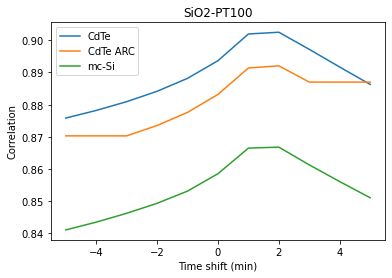

In [360]:
f1 = C1b.plot(label = 'CdTe')
f2 = C2b.plot(label = 'CdTe ARC')
f3 = C3b.plot(label = 'mc-Si')
plt.xlabel("Time shift (min)")
plt.ylabel("Correlation")
plt.legend(loc = 'best')
plt.title('SiO2-PT100')

In [362]:
pxir

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-01-01 09:18:00+00:00,0.141575,0.137328,0.248801,0.208871,5.670451,4.225675,23.460000,0,22.366667,0,0.000419
2018-01-01 09:19:00+00:00,2.365055,3.046951,3.639148,3.529974,8.430031,7.858465,24.440000,0,23.553333,0,0.006720
2018-01-01 09:20:00+00:00,8.832820,7.877726,8.463873,8.083471,14.737640,14.295510,25.558333,0,24.875000,0,0.024000
2018-01-01 09:21:00+00:00,9.738307,9.446158,10.550240,10.233740,18.614190,18.055770,25.400000,0,24.745000,0,0.026625
2018-01-01 09:22:00+00:00,10.773150,10.449960,12.049820,11.688320,20.125390,19.521630,25.380000,0,24.265000,0,0.029477
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:41:00+00:00,9.156209,7.752251,12.245410,11.878050,32.642060,31.726530,25.995000,0,23.616667,0,0.024460
2020-12-31 21:42:00+00:00,10.902500,10.575430,13.027800,12.636970,33.331950,32.332000,24.768333,0,22.063333,0,0.030568
2020-12-31 21:43:00+00:00,10.902500,10.230380,13.027800,12.636970,31.557940,30.611200,21.841667,0,19.018333,0,0.034664
2020-12-31 21:44:00+00:00,5.469584,6.434767,7.811882,6.628881,26.498710,25.703750,18.908333,0,15.995000,0,0.020088


In [ ]:
  start = '2020-01-10 14:46:00+00:00'
              end   = '2020-01-10 14:56:00+00:00'

              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path + '2020-01-10 14:51:00+00:00' + 'd5' + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path  + '2020-01-10 14:51:00+00:00' + 'd5' + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20,10))

              f1= pxirb['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxirb['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')


              f4 = pxirb['GHIP_SI02pt100'].loc[start:end].plot(ax=axes[2],color = 'salmon',label='SI02pt100')
              l4=axes[2].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[2].legend(loc='best')

              figname =  figs_path  + '2020-01-10 14:51:00+00:00' + 'd5' + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()

In [363]:
pxirb.loc['2020-01-03 08:28:00+00:00']

Paccdt              0.0000
Pdccdt              0.0000
Paccdta             0.0000
Pdccdta             0.0000
Pacpsi              0.0000
Pdcpsi              0.0000
GHIP_SI02pt100      6.0567
F_GHIP_SI02pt100    0.0000
Name: 2020-01-03 08:28:00+00:00, dtype: float64

In [419]:
oie

'2019-09-23 16:15:00+00:00'

In [420]:
eoie_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNminGTI/"
oie_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/CORRECTED/"

In [421]:
 dfOIE = pd.read_csv(oie_path +'2019GHIP_SMP11_OIEC1min2.csv')  

In [422]:
dfOIE

,Unnamed: 0,start,end,duration,ibe,min,max,avg
0,0,2019-01-06 16:25:00+00:00,2019-01-06 16:26:00+00:00,1,NaN,1464.733333,1487.766667,1476.250000
1,1,2019-01-06 16:29:00+00:00,2019-01-06 16:30:00+00:00,1,0 days 00:04:00,1373.950000,1453.766667,1413.858333
2,2,2019-01-06 17:13:00+00:00,2019-01-06 17:13:00+00:00,0,0 days 00:44:00,1270.416667,1270.416667,1270.416667
3,3,2019-01-06 19:48:00+00:00,2019-01-06 19:50:00+00:00,2,0 days 02:35:00,707.591667,720.115000,713.482778
4,4,2019-01-07 12:39:00+00:00,2019-01-07 12:39:00+00:00,0,0 days 16:51:00,1160.666667,1160.666667,1160.666667
...,...,...,...,...,...,...,...,...
207,207,2019-12-19 12:42:00+00:00,2019-12-19 12:42:00+00:00,0,0 days 00:03:00,1195.016667,1195.016667,1195.016667
208,208,2019-12-19 12:45:00+00:00,2019-12-19 12:45:00+00:00,0,0 days 00:03:00,1219.576271,1219.576271,1219.576271
209,209,2019-12-19 12:49:00+00:00,2019-12-19 12:52:00+00:00,3,0 days 00:04:00,1198.850000,1245.200000,1220.012500
210,210,2019-12-20 15:08:00+00:00,2019-12-20 15:08:00+00:00,0,1 days 02:19:00,1416.500000,1416.500000,1416.500000


In [435]:
 dfEOIE = pd.read_csv(eoie_path +'2019TGIP_SMP11_VENT_OIEC2min.csv')  

In [436]:
dfEOIE

,Unnamed: 0,start,end,duration,ibe,min,max,avg
0,0,2019-01-06 16:25:00+00:00,2019-01-06 16:25:00+00:00,0 days 00:00:00,NaN,1370.033333,1370.033333,1370.033333
1,1,2019-01-12 14:11:00+00:00,2019-01-12 14:15:00+00:00,0 days 00:04:00,5 days 21:46:00,1366.366667,1509.800000,1424.453333
2,2,2019-01-13 14:34:00+00:00,2019-01-13 14:34:00+00:00,0 days 00:00:00,1 days 00:23:00,1449.433333,1449.433333,1449.433333
3,3,2019-01-13 14:37:00+00:00,2019-01-13 14:37:00+00:00,0 days 00:00:00,0 days 00:03:00,1480.966667,1480.966667,1480.966667
4,4,2019-01-16 15:09:00+00:00,2019-01-16 15:11:00+00:00,0 days 00:02:00,3 days 00:32:00,1400.933333,1421.166667,1407.877778
5,5,2019-01-16 15:17:00+00:00,2019-01-16 15:17:00+00:00,0 days 00:00:00,0 days 00:08:00,1395.450000,1395.450000,1395.450000
6,6,2019-01-16 15:19:00+00:00,2019-01-16 15:19:00+00:00,0 days 00:00:00,0 days 00:02:00,1369.183333,1369.183333,1369.183333
7,7,2019-01-25 14:56:00+00:00,2019-01-25 14:57:00+00:00,0 days 00:01:00,8 days 23:37:00,1397.215000,1435.550000,1416.382500
8,8,2019-02-02 14:40:00+00:00,2019-02-02 14:41:00+00:00,0 days 00:01:00,7 days 23:44:00,1376.133333,1457.600000,1416.866667
9,9,2019-02-02 15:20:00+00:00,2019-02-02 15:22:00+00:00,0 days 00:02:00,0 days 00:40:00,1379.433333,1444.116667,1410.516667


In [425]:
dfOIE = dfOIE.set_index('start')

In [448]:
dfOIE = dfOIE[['duration','ibe', 'min', 'max', 'avg']]

In [449]:
dfOIE

,duration,ibe,min,max,avg
start,,,,,
2019-01-06 16:25:00+00:00,1,NaN,1464.733333,1487.766667,1476.250000
2019-01-06 16:29:00+00:00,1,0 days 00:04:00,1373.950000,1453.766667,1413.858333
2019-01-06 17:13:00+00:00,0,0 days 00:44:00,1270.416667,1270.416667,1270.416667
2019-01-06 19:48:00+00:00,2,0 days 02:35:00,707.591667,720.115000,713.482778
2019-01-07 12:39:00+00:00,0,0 days 16:51:00,1160.666667,1160.666667,1160.666667
...,...,...,...,...,...
2019-12-19 12:42:00+00:00,0,0 days 00:03:00,1195.016667,1195.016667,1195.016667
2019-12-19 12:45:00+00:00,0,0 days 00:03:00,1219.576271,1219.576271,1219.576271
2019-12-19 12:49:00+00:00,3,0 days 00:04:00,1198.850000,1245.200000,1220.012500


In [440]:
dfEOIE = dfEOIE.set_index('start')

In [457]:
dfEOIE = dfEOIE[['duration','min', 'max', 'avg']]

In [456]:
dfEOIE['duration'] = (dfEOIE['duration'] / np.timedelta64(1, 'm')).astype(int)



UFuncTypeError: ufunc 'true_divide' cannot use operands with types dtype('int64') and dtype('<m8[ns]')

In [458]:
dfEOIE

,duration,min,max,avg
start,,,,
2019-01-06 16:25:00+00:00,0,1370.033333,1370.033333,1370.033333
2019-01-12 14:11:00+00:00,4,1366.366667,1509.800000,1424.453333
2019-01-13 14:34:00+00:00,0,1449.433333,1449.433333,1449.433333
2019-01-13 14:37:00+00:00,0,1480.966667,1480.966667,1480.966667
2019-01-16 15:09:00+00:00,2,1400.933333,1421.166667,1407.877778
2019-01-16 15:17:00+00:00,0,1395.450000,1395.450000,1395.450000
2019-01-16 15:19:00+00:00,0,1369.183333,1369.183333,1369.183333
2019-01-25 14:56:00+00:00,1,1397.215000,1435.550000,1416.382500
2019-02-02 14:40:00+00:00,1,1376.133333,1457.600000,1416.866667


In [459]:
dfEOIE.shape

(36, 4)

In [441]:
dfEOIE.index

Index(['2019-01-06 16:25:00+00:00', '2019-01-12 14:11:00+00:00',
       '2019-01-13 14:34:00+00:00', '2019-01-13 14:37:00+00:00',
       '2019-01-16 15:09:00+00:00', '2019-01-16 15:17:00+00:00',
       '2019-01-16 15:19:00+00:00', '2019-01-25 14:56:00+00:00',
       '2019-02-02 14:40:00+00:00', '2019-02-02 15:20:00+00:00',
       '2019-02-02 15:30:00+00:00', '2019-02-18 15:12:00+00:00',
       '2019-02-18 15:19:00+00:00', '2019-02-28 14:52:00+00:00',
       '2019-02-28 15:29:00+00:00', '2019-03-01 15:24:00+00:00',
       '2019-03-04 16:45:00+00:00', '2019-03-11 14:23:00+00:00',
       '2019-03-11 14:34:00+00:00', '2019-03-11 14:46:00+00:00',
       '2019-03-23 15:51:00+00:00', '2019-03-23 16:00:00+00:00',
       '2019-03-29 14:32:00+00:00', '2019-03-29 15:24:00+00:00',
       '2019-03-29 15:30:00+00:00', '2019-03-29 15:37:00+00:00',
       '2019-03-29 15:42:00+00:00', '2019-03-29 15:46:00+00:00',
       '2019-03-29 16:00:00+00:00', '2019-03-29 16:05:00+00:00',
       '2019-03-31 15:41:

In [438]:
dfEOIE.start

0     2019-01-06 16:25:00+00:00
1     2019-01-12 14:11:00+00:00
2     2019-01-13 14:34:00+00:00
3     2019-01-13 14:37:00+00:00
4     2019-01-16 15:09:00+00:00
5     2019-01-16 15:17:00+00:00
6     2019-01-16 15:19:00+00:00
7     2019-01-25 14:56:00+00:00
8     2019-02-02 14:40:00+00:00
9     2019-02-02 15:20:00+00:00
10    2019-02-02 15:30:00+00:00
11    2019-02-18 15:12:00+00:00
12    2019-02-18 15:19:00+00:00
13    2019-02-28 14:52:00+00:00
14    2019-02-28 15:29:00+00:00
15    2019-03-01 15:24:00+00:00
16    2019-03-04 16:45:00+00:00
17    2019-03-11 14:23:00+00:00
18    2019-03-11 14:34:00+00:00
19    2019-03-11 14:46:00+00:00
20    2019-03-23 15:51:00+00:00
21    2019-03-23 16:00:00+00:00
22    2019-03-29 14:32:00+00:00
23    2019-03-29 15:24:00+00:00
24    2019-03-29 15:30:00+00:00
25    2019-03-29 15:37:00+00:00
26    2019-03-29 15:42:00+00:00
27    2019-03-29 15:46:00+00:00
28    2019-03-29 16:00:00+00:00
29    2019-03-29 16:05:00+00:00
30    2019-03-31 15:41:00+00:00
31    20

In [462]:
dfOIE = dfOIE[['duration','min', 'max', 'avg']]

In [464]:
dfOIE

,duration,min,max,avg
start,,,,
2019-01-06 16:25:00+00:00,1,1464.733333,1487.766667,1476.250000
2019-01-06 16:29:00+00:00,1,1373.950000,1453.766667,1413.858333
2019-01-06 17:13:00+00:00,0,1270.416667,1270.416667,1270.416667
2019-01-06 19:48:00+00:00,2,707.591667,720.115000,713.482778
2019-01-07 12:39:00+00:00,0,1160.666667,1160.666667,1160.666667
...,...,...,...,...
2019-12-19 12:42:00+00:00,0,1195.016667,1195.016667,1195.016667
2019-12-19 12:45:00+00:00,0,1219.576271,1219.576271,1219.576271
2019-12-19 12:49:00+00:00,3,1198.850000,1245.200000,1220.012500


In [467]:
oieeoie = pd.merge(dfOIE,dfEOIE, how = 'inner', left_index = True, right_index = True, )

In [468]:
oieeoie

,duration_x,min_x,max_x,avg_x,duration_y,min_y,max_y,avg_y
start,,,,,,,,
2019-01-06 16:25:00+00:00,1,1464.733333,1487.766667,1476.250000,0,1370.033333,1370.033333,1370.033333
2019-01-12 14:11:00+00:00,4,1410.033333,1570.183333,1477.723333,4,1366.366667,1509.800000,1424.453333
2019-01-13 14:34:00+00:00,0,1532.200000,1532.200000,1532.200000,0,1449.433333,1449.433333,1449.433333
2019-01-13 14:37:00+00:00,0,1558.366667,1558.366667,1558.366667,0,1480.966667,1480.966667,1480.966667
2019-01-16 15:17:00+00:00,3,1411.700000,1461.933333,1429.562500,0,1395.450000,1395.450000,1395.450000
2019-01-25 14:56:00+00:00,1,1436.045000,1466.833333,1451.439167,1,1397.215000,1435.550000,1416.382500
2019-02-02 14:40:00+00:00,2,1366.050000,1490.733333,1421.377778,1,1376.133333,1457.600000,1416.866667
2019-02-02 15:20:00+00:00,5,1388.266667,1483.933333,1422.522222,2,1379.433333,1444.116667,1410.516667
2019-02-02 15:30:00+00:00,0,1456.916667,1456.916667,1456.916667,0,1396.866667,1396.866667,1396.866667


In [469]:
oieeoie.shape

(31, 8)

In [473]:
oieeoie2 = pd.merge(dfEOIE, dfOIE, how = 'left', left_index = True, right_index = True, )

In [474]:
oieeoie2.shape

(36, 8)

In [475]:
oieeoie2

,duration_x,min_x,max_x,avg_x,duration_y,min_y,max_y,avg_y
start,,,,,,,,
2019-01-06 16:25:00+00:00,0,1370.033333,1370.033333,1370.033333,1.0,1464.733333,1487.766667,1476.250000
2019-01-12 14:11:00+00:00,4,1366.366667,1509.800000,1424.453333,4.0,1410.033333,1570.183333,1477.723333
2019-01-13 14:34:00+00:00,0,1449.433333,1449.433333,1449.433333,0.0,1532.200000,1532.200000,1532.200000
2019-01-13 14:37:00+00:00,0,1480.966667,1480.966667,1480.966667,0.0,1558.366667,1558.366667,1558.366667
2019-01-16 15:09:00+00:00,2,1400.933333,1421.166667,1407.877778,NaN,NaN,NaN,NaN
2019-01-16 15:17:00+00:00,0,1395.450000,1395.450000,1395.450000,3.0,1411.700000,1461.933333,1429.562500
2019-01-16 15:19:00+00:00,0,1369.183333,1369.183333,1369.183333,NaN,NaN,NaN,NaN
2019-01-25 14:56:00+00:00,1,1397.215000,1435.550000,1416.382500,1.0,1436.045000,1466.833333,1451.439167
2019-02-02 14:40:00+00:00,1,1376.133333,1457.600000,1416.866667,2.0,1366.050000,1490.733333,1421.377778


In [476]:
pxir

,Pdccdt,Paccdt,Pdccdta,Paccdta,Pdcpsi,Pacpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt
2018-01-01 09:18:00+00:00,0.141575,0.137328,0.248801,0.208871,5.670451,4.225675,23.460000,0,22.366667,0,0.000419
2018-01-01 09:19:00+00:00,2.365055,3.046951,3.639148,3.529974,8.430031,7.858465,24.440000,0,23.553333,0,0.006720
2018-01-01 09:20:00+00:00,8.832820,7.877726,8.463873,8.083471,14.737640,14.295510,25.558333,0,24.875000,0,0.024000
2018-01-01 09:21:00+00:00,9.738307,9.446158,10.550240,10.233740,18.614190,18.055770,25.400000,0,24.745000,0,0.026625
2018-01-01 09:22:00+00:00,10.773150,10.449960,12.049820,11.688320,20.125390,19.521630,25.380000,0,24.265000,0,0.029477
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:41:00+00:00,9.156209,7.752251,12.245410,11.878050,32.642060,31.726530,25.995000,0,23.616667,0,0.024460
2020-12-31 21:42:00+00:00,10.902500,10.575430,13.027800,12.636970,33.331950,32.332000,24.768333,0,22.063333,0,0.030568
2020-12-31 21:43:00+00:00,10.902500,10.230380,13.027800,12.636970,31.557940,30.611200,21.841667,0,19.018333,0,0.034664
2020-12-31 21:44:00+00:00,5.469584,6.434767,7.811882,6.628881,26.498710,25.703750,18.908333,0,15.995000,0,0.020088
